In [2]:
import gdown
gdown.download(id='1Dt_ze8lf_hnOv9gNCpLNJKq6rIUhFvoA')
!unzip 03_Clinical-20230717T233033Z-001.zip
!rm 03_Clinical-20230717T233033Z-001.zip


Downloading...
From: https://drive.google.com/uc?id=1Dt_ze8lf_hnOv9gNCpLNJKq6rIUhFvoA
To: /content/03_Clinical-20230717T233033Z-001.zip
100%|██████████| 70.9M/70.9M [00:01<00:00, 48.5MB/s]


Archive:  03_Clinical-20230717T233033Z-001.zip
  inflating: 03_Clinical/Dollomaja/connectivity.vep.zip  
  inflating: 03_Clinical/Stefanovski/_HC/HC_RH.txt  
  inflating: 03_Clinical/Stefanovski/_HC/DS_Store  
  inflating: 03_Clinical/Stefanovski/_MCI/MCI_RH.txt  
  inflating: 03_Clinical/Stefanovski/_MCI/MCI_LH.txt  
  inflating: 03_Clinical/Stefanovski/_MCI/leadfield.mat  
  inflating: 03_Clinical/Stefanovski/_MCI/MCI_subcortical.txt  
  inflating: 03_Clinical/Stefanovski/Connectome/centres.txt  
  inflating: 03_Clinical/Stefanovski/_AD/AD_subcortical.txt  
  inflating: 03_Clinical/Dollomaja/seeg.xyz  
  inflating: 03_Clinical/Stefanovski/Images/Jansen-Rit.png  
  inflating: 03_Clinical/Stefanovski/_AD/AD_RH.txt  
  inflating: 03_Clinical/Stefanovski/_MCI/DS_Store  
  inflating: 03_Clinical/Stefanovski/_HC/leadfield.mat  
  inflating: 03_Clinical/Stefanovski/Connectome/hemispheres.txt  
  inflating: 03_Clinical/Stefanovski/_HC/HC_subcortical.txt  
  inflating: 03_Clinical/Stefanovski

***Dr. Davide Momi***<br/>
​-----------<br/>
Post-Doctoral Research Fellow<br/>
Whole Brain Modelling Group<br/>
Krembil Centre for Neuroinformatics - CAMH<br/>
250 College St., Toronto, ON M5T 1R8<br/>
website: https://davi1990.github.io/<br/>
Twitter: @DaveMomi<br/>
<br/>
<br/>
***Borana Dollomaja***<br/>
​-----------<br/>
Ph.D. Candidate<br/>
Institut de Neurosciences des Systèmes<br/>
<br/>
<br/>
***Dr. Leon Stefanovski***<br/>
​-----------<br/>
Medical Doctor and ​Post-Doctoral Research Fellow<br/>
Berlin Institute of Health (BIH)<br/>
Charité Universitätsmedizin Berlin<br/>
<br/>




#### 3) Applications 2: Clinical

## **Sessions's Speakers**

![alt text](https://drive.google.com/uc?id=13bU3-qoaFWU5Y__yY-Cprulp9zg4DHlG)

-----

## Contents


[Overview](#overview)  
[Setup](#setup)  
[Modeling Alzheimer](#modeling-Alzheimer)  
[Modeling Epilepsy](#modeling-epilepsy)  
[Conclusions](#conclusions)  
[References](#references)

## Overview

During this final session of the Educational Course, our focus will be on the significance of whole-brain modeling in clinical settings. The tutorial will demonstrate how simulating brain dynamics can reveal mechanisms related to the pathology that cannot be measured in vivo. Additionally, the utilization of whole-brain modeling holds great importance in identifying disease biomarkers for early-stage diagnosis and classification.

Spefically we will delve into two diseases:

1) **Alzheimer's disease** and   
2) **Epilepsy**.  


Demonstrations are run using mainly the [**The Virtual Brain Toolbox**](https://thevirtualbrain.org/tvb/zwei) who has the purpose of offering modern tools to the Neurosciences community, for computing, simulating and analyzing functional and structural data of human brains, brains modeled at the level of population of neurons.


## Setup

If you are running this notebook in Google Colab, you will need to install some packages. If you are running in a more standard python environment, you need to ensure that these packages are installed externally (typically with `pip install <package>` on the command line).  

In [3]:
import sys
!{sys.executable} -m pip install mne > /dev/null
!{sys.executable} -m pip install nilearn > /dev/null
!{sys.executable} -m pip install nibabel > /dev/null
!{sys.executable} -m pip install tvb-data > /dev/null
!{sys.executable} -m pip install tvb-library > /dev/null

import os
os.chdir('//content/03_Clinical')

# @title Install dependencies

In [4]:
%pylab inline

from tvb.simulator.lab import *
from tvb.basic.neotraits.api import NArray, List, Range, Final
import numpy as np
import scipy.io as sio
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib
import os
import multiprocessing as mp
from matplotlib.gridspec import GridSpec
from PIL import Image
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive
from scipy.optimize import fsolve

# @title Importage

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


## **Linking mechanistic multi-scale brain simulation and knowledge technology towards a holistic understanding of Alzheimer’s Disease**

In this part we will explore how the how computational multi-scale brain modeling can links phenomena of different scales and therefore identifies potential disease mechanisms of Alzheimer's disease (AD) as demonstrated in [Stefanovski et al. 2019](https://www.frontiersin.org/articles/10.3389/fncom.2019.00054/full)

![alt text](https://www.frontiersin.org/files/Articles/463671/fncom-13-00054-HTML/image_m/fncom-13-00054-g001.jpg)

## Introduction

Here we present an approach to link molecular information to large-scale simulations of The Virtual Brain.
This script allows the construction of cause-and-effect models that transfer regional information (of any kind)
into a shift of a paramter of the regional dynamic model of The Virtual Brain.

Parts of the empirical data were obtained from the Alzheimer’s Disease Neuroimaging Initiative (ADNI) database
(adni.loni.usc.edu). Here, we only present group-based data for testing purposes. The ADNI was launched in 2003 as a public-private partnership, led by Principal Investigator Michael W. Weiner. The primary goal of ADNI has been to test whether
serial MRI, PET, other biological markers, and clinical and neuropsychological assessment can be
combined to measure the progression of MCI and early AD. For up-to-date information, see www.adni-info.org.
ADNI acknowledgements:
http://adni.loni.usc.edu/wp-content/themes/freshnews-dev-v2/documents/policy/ADNI_Acknowledgement_List%205-29-18.pdf'


**Requirements**

The example code in this script makes use of molecular information in simple arrays.
Each array consists of a value for different amounts of brain regions, namely

180 values for the left hemisphere as an txt-file (Glasser)
180 values for the right hemisphere as an txt-file (Glasser)
19 values for subcortical regions as an txt-file (Fischl)

Some of these maps have only unilateral cortical information and therefor eonly 180 values.

Necessary data is moreover:
1 structural connectivity matrix in .txt format
for each subject 1 leadfield matrix (if EEG calculation is desired)

NOTE: we provide an artificial surrogate dataset that is created by averaging empirical data in ADNI as molecular input as well as an averaged stuctrual connecitivty matrix and a leadfield matrix For the original dataset of ADNI, please apply for access to ADNI-3: http://adni.loni.usc.edu/data-samples/access-data/

Of course, any other form of an array is also suitable, as well as other atlases.
In this case, you would need to adapt the code accordingly - including the used strcutural connectivity.

**Atlas**

We make use of two brain atlases: Glasser for cortical areas and Fischl for subcortical areas.

Glasser atlas:
Glasser, M. F., T. S. Coalson, E. C. Robinson, C. D. Hacker, J. Harwell, E. Yacoub,
K. Ugurbil, J. Andersson, C. F. Beckmann, M. Jenkinson, S. M. Smith and D. C. Van Essen (2016).
"A multi-modal parcellation of human cerebral cortex." Nature 536(7615): 171-178.

Subcortical Fischl atlas (from freesurfer):
Fischl, B., D. H. Salat, E. Busa, M. Albert, M. Dieterich, C. Haselgrove, A. van der Kouwe,
R. Killiany, D. Kennedy, S. Klaveness, A. Montillo, N. Makris, B. Rosen and A. M. Dale (2002).
"Whole brain segmentation: automated labeling of neuroanatomical structures in the human brain."
Neuron 33(3): 341-355.

**Transfer functions**

As a general concept, we introduce so-called transfer functions to translate the effect of a molecular array into a shift of dynamic parameters in TVB's neural mass models. In the follwoing, we will introduce some common forms for transfer functions.

**Sigmoid**

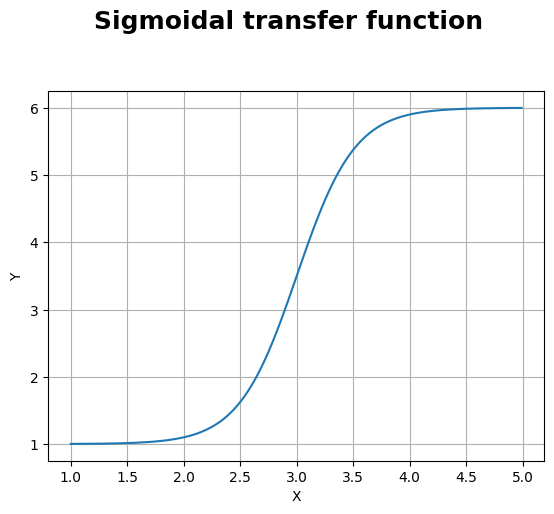

In [ ]:
# Sigmoidal functions are common in natural relationships.
# Their most important characteristics are an upper and lower limit and the steepness of the curve inbetween
# The function will transform an input variable (from the arrays) into a parameter of TVB

y_min = 1
# y_min is the lower asymptote of the sigmoid with

y_max  = 5
# y_max is the differnece between lower and upper asymptote of the sigmoid
# y_max + y_min is the upper asymptote of the sigmoid

x_1 = 4
# x_1 is the cut-off x value from which on the sigmoid increases / decreases

x_2 = 2
# x_2 is the x value where the sigmoid gets near to the second asymptote
# If x_1 > x_2, the sigmoid increases
# If x_2 > x_1, the sigmoid decreases

c = 0.1
# the steepness k can be adjusted by the parameter c

# x_0 (value of  sigmoid midpoint) is derived from the variables above

def transform_sigmoid(x, y_max, y_min, x_1, x_2):
    x_0       = (x_2 - x_1) / 2  + x_1
    k = np.log( y_max / ((y_min+c) - y_min) -1) / (x_2 - x_0)
    return  y_max / (1 + np.exp(k * (x - x_0) )) + y_min

# visualize
a = np.arange(1.,5,0.01)
plt.plot(a, transform_sigmoid(a, y_max, y_min, x_1, x_2))
plt.xlabel("X")
plt.ylabel("Y")
plt.suptitle("Sigmoidal transfer function", fontweight="bold", fontsize="18", y = 1.05)
plt.grid()
plt.show()

Linear

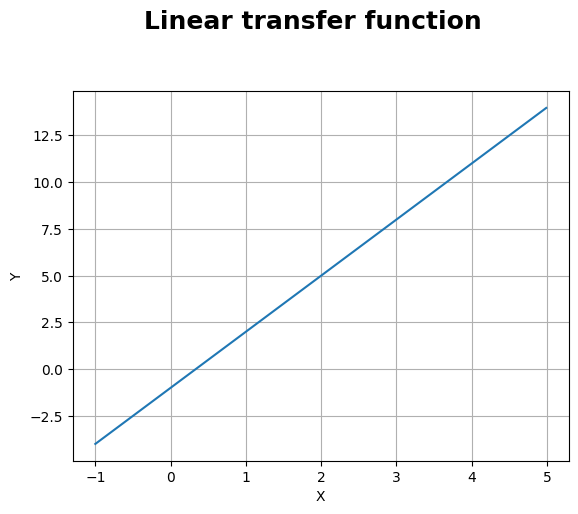

In [ ]:
# Linear functions are reflecting simple relationships.
# As they do not have an upper or lower limit, for relationships with these limits and a linear dependency inbetween
# consider a sigmoid with adequate steepness
# General form: y = mx + c

m = 3
# m is the increment of the linear function

c = -1
# c is the ordinate intercept of the function

def transform_linear(x, m, c):
    return  m*x + c

# visualize
a = np.arange(-1.,5,0.01)
plt.plot(a, transform_linear(a,m,c))
plt.xlabel("X")
plt.ylabel("Y")
plt.suptitle("Linear transfer function", fontweight="bold", fontsize="18", y = 1.05)
plt.grid()
plt.show()

**Other Transfer Functions**

In general, there are no restrictions of what mathematical function you can use to translate an empirical input into a parameter fo the simulation - as, e.g., logarithmic or polynomial functions. We recommend, however, to base the choice of a transfer function clearly on a biological concept, as this will increase the real-world usability.


# Cause-and-effect model for Abeta: sigmoidal transfer function (Stefanovski et al. 2019)

As a first example use case, we will reproduce simulations from our former study and show some core results.

In this study the regional burden of Amyloid beta (Abeta) is derived from AV-45 positrone emission tomography (PET)
A cause-and-effect model defines the inhibitory rate of each region as a function of the Abeta burden
This leads to an AD-specific slowing in local field potentials and EEG.

Please cite as:

Stefanovski, L., P. Triebkorn, A. Spiegler, M.-A. Diaz-Cortes, A. Solodkin, V. Jirsa,
R. McIntosh and P. Ritter; for the Alzheimer's disease Neuromigang Initiative (2019).
"Linking molecular pathways and large-scale computational modeling to assess candidate
disease mechanisms and pharmacodynamics in Alzheimer's disease." Frontiers in Computational Neuroscience 13(54).

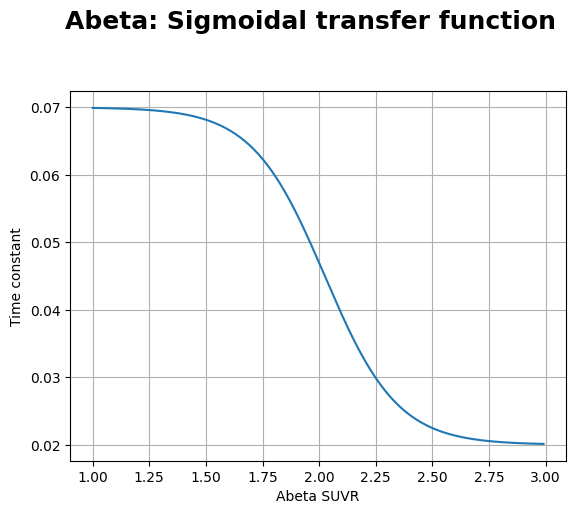

In [ ]:
# Evidence for local effects of Abeta to inhibitory interneurons, e.g.:
# Ren et al. 2018 Scientific Reports: https://www.nature.com/articles/s41598-017-18729-5
# Ulrich 2015 J Neurosci: http://www.jneurosci.org/content/jneuro/35/24/9205.full.pdf
# Ripoli et al. 2014 J Neurosci: http://www.jneurosci.org/content/34/38/12893
# We define here the local inhibitory rate b as a function of Abeta burden:

y_min = 0.02
# y_min is the lower asymptote of the sigmoid with a inhibitory time constant tau_i = 1/b = 50 ms

y_max  = 0.05
# y_max is the differnece between lower and upper asymptote of the sigmoid
# y_min + y_max is the upper asymptote of the sigmoid at tau_i = 1/b = 14.29 ms

x_1 = 1.4
# x_1 is the cut-off SUVR from which on the sigmoid decreases,
# see Jack et al. 2014 Lancet Neurol: https://www.ncbi.nlm.nih.gov/pubmed/25201514

x_2 = 2.65
# x_2 is the 95th perecentile of Abeta SUVRs in the original study population

c = 0.001
# to achieve almost linear decrement between x_1 and x_2

# visualize
a = np.arange(1.,3,0.01)
plt.plot(a, transform_sigmoid(a, y_max, y_min, x_1, x_2))
plt.xlabel("Abeta SUVR")
plt.ylabel("Time constant")
plt.suptitle("Abeta: Sigmoidal transfer function", fontweight="bold", fontsize="18", y = 1.05)
plt.grid()
plt.show()

# Load individual Abeta PET SUVRs

Have an initial look to the PET arrays for the groups AD, MCI ad HC:

In [ ]:
# As an example, we will show how to load the molecular data with PET data
# here you can select the subjects you want to simulate

os.chdir('/content//03_Clinical/Stefanovski')

DX = "AD" # one of AD, MCI or HC
modality="Amyloid"
pet_path="./_"+DX
RH_pet = np.loadtxt(pet_path+"/"+DX+"_RH.txt")
LH_pet = np.loadtxt(pet_path+"/"+DX+"_LH.txt")
subcort_pet = np.loadtxt(pet_path+"/"+DX+"_subcortical.txt")
abeta_burden = np.concatenate((LH_pet,RH_pet,subcort_pet))

##### Visualize histogram of molecular input data

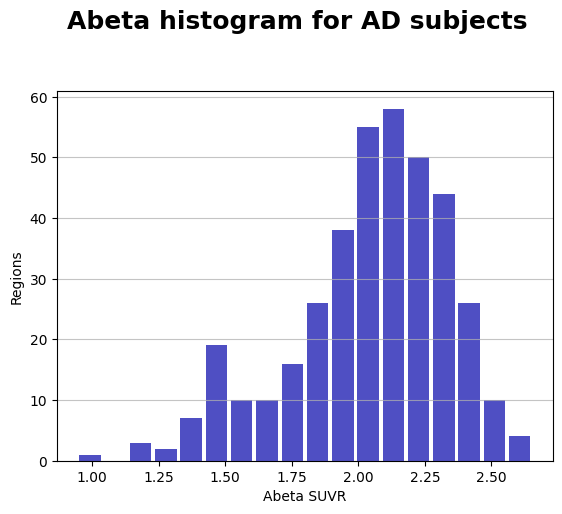

In [ ]:
n, bins, patches = plt.hist(abeta_burden, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Abeta SUVR')
plt.ylabel('Regions')
plt.suptitle("Abeta histogram for "+DX+" subjects", fontweight="bold", fontsize="18", y = 1.05)
plt.show()

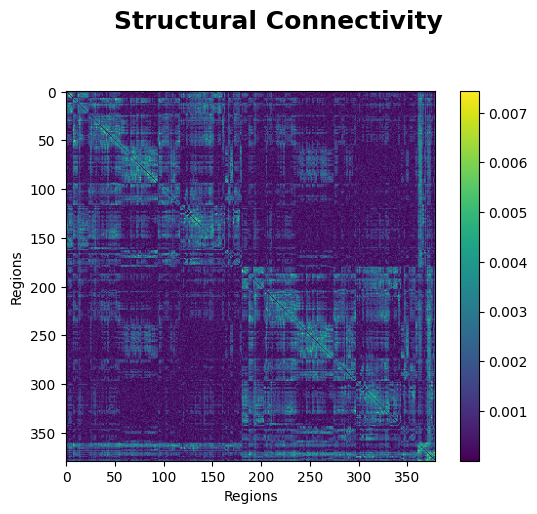

In [ ]:
# load strcutural connectivity matrix
SCnorm = np.loadtxt("./Connectome/avg_healthy_normSC_mod.txt")

# For simulations without the 19 subcortical regions, use SCnorm[0:360,0:360]

# Visualization of the matrix
plt.imshow(np.asarray(SCnorm))
plt.colorbar()
plt.xlabel("Regions")
plt.ylabel("Regions")
plt.suptitle("Structural Connectivity", fontweight="bold", fontsize="18", y = 1.05)
plt.show()

In [ ]:
# load leadfield matrix
lf_mat = sio.loadmat("./_"+DX+"/leadfield.mat")["lf_sum"]

**Neural Mass Model selection**

Here, we make use of the Jansen-Rit model. It is origianlly described in:

*Jansen, B. H. and V. G. Rit (1995). "Electroencephalogram and visual evoked potential generation in a mathematical model of coupled cortical columns." Biol Cybern 73(4): 357-366.*

and in

*Jansen BH, Zouridakis G, and Brandt M. A neurophysiologically-based mathematical model of flash visual evoked potentials. Biol. Cybern. 68, 275:283, 1993.*

A description of its implementation to TVB, as well as a comparison with other neural mass models, can be found in:

*Sanz-Leon, P., S. A. Knock, A. Spiegler and V. K. Jirsa (2015). "Mathematical framework for large-scale brain network modeling in The Virtual Brain." NeuroImage 111: 385-430.*

It makes use of three neural populations: pyramidal cells, excitatory internueons and inhibitory interneurons.

![alt text](https://www.frontiersin.org/files/Articles/463671/fncom-13-00054-HTML/image_m/fncom-13-00054-g002.jpg)

Notation in the figure according to Stefanovski et al. 2019.

The equations of the Jansen-Rit model as implemented in TVB are the following:
\begin{equation}
\dot{y_{0}} = y_{3} \\
\dot{y_{3}} = Aa Sigm(y_{1} -  y_{2}) - 2a y_{3} - a^{2} y_{0} \\
\dot{y_{1}} = y_{4} \\
\dot{y_{4}} = Aa [p(t) + \alpha_2 J Sigm[\alpha_1 J y_0] + lrc + src] -2a y_{4} - a^{2} y_{1}\\
\dot{y_{2}} = y_{5} \\
\dot{y_5} = Bb (\alpha_4 J Sigm[\alpha_3 J y_{0}]) - 2b y_{5} - b^{2} y_{2} \\
\end{equation}

with
\begin{equation}
Sigm(\nu) = \frac{2 \nu_{max}}{1 + \exp^{r(\nu_{0} - \nu)}}
\end{equation}

Source code in TVB can be found here:

https://github.com/the-virtual-brain/tvb-root/blob/master/scientific_library/tvb/simulator/models/jansen_rit.py


# Available parameters are:

$A$ = Maximum amplitude of EPSP [mV]. Also called average synaptic gain.

$B$ = Maximum amplitude of IPSP [mV]. Also called average synaptic gain.

$a$ = Reciprocal of the time constant of passive membrane and all other spatially distributed delays in the dendritic network [ms^-1]. Also called average synaptic time constant.

$b$ = Reciprocal of the time constant of passive membrane and all
other spatially distributed delays in the dendritic network [ms^-1].
Also called average synaptic time constant.

$v_0$ = Firing threshold (PSP) for which a 50% firing rate is achieved.In other words, it is the value of the average membrane potential corresponding to the inflection point of the sigmoid [mV]. The usual value for this parameter is 6.0.

$\nu_{max}$ = Determines the maximum firing rate of the neural population [s^-1].

$r$ = Steepness of the sigmoidal transformation [mV^-1].

$J$ = Average number of synapses between populations.

$a_1$ = Average probability of synaptic contacts in the feedback excitatory loop.

$a_2$ = Average probability of synaptic contacts in the slow feedback excitatory loop.

$a_3$ = Average probability of synaptic contacts in the feedback inhibitory loop.

$a_4$ = Average probability of synaptic contacts in the slow feedback inhibitory loop.

$p_{min}$ = Minimum input firing rate.

$p_{max}$ = Maximum input firing rate.

$\mu$ = Mean input firing rate

In the example study, we used b, the inhibitory membrane constant, to be modulated by local Abeta concentration.
This introduces further heterogenity to produce oscialltions in the absence of artificial noise.

In [ ]:
b = transform_sigmoid(abeta_burden, y_max, y_min, x_1, x_2)

**Jansen-Rit Model Configuration**

First, we build an extended version of the Jansen-Rit model to obrain the outgoing projections, represented by the differnece between state variables of pyramidal cells and inhibitory interneurons:

In [ ]:
class ExtendedJansenRit(models.JansenRit):
    variables_of_interest = List(
        of=str,
        label="Variables watched by Monitors",
        choices=(["y1-y2"]),
        default=(["y1-y2"]))
ExtendedJansenRit()

Second, we define the desired monitor, in this case the subsample monitor:

In [ ]:
subsample = simulator.monitors.SubSample(period=5)
subsample.configure()
subsample

Third, we define the underlying structural connectivity. Here, we can use a pre-calculated SC provided as a zip-file, containing avreaged SC weights of healthy controls:

In [ ]:
# omitting any time delay between regions
white_matter = connectivity.Connectivity.from_file('/content/03_Clinical/Stefanovski/Connectome/SC.zip')
white_matter.configure()
white_matter

Now, we create random initial conditions for the simulation:

In [ ]:
init = np.random.rand(4000,6,SCnorm.shape[0],1);

And assess the modeling parameters:

In [ ]:
mu = np.array(0.1085)
jrm = ExtendedJansenRit(v0=np.array(6), mu=mu, p_max=mu, p_min=mu,
                       b = np.array(b))

In [ ]:
# set up the simulator
# adjust the simulation_length to your needs/ available computation time
# in the paper a simulation_length of 120000 was used
# but only the 2nd minute was used in the analysis to cut out possible transients
sim = simulator.Simulator(  connectivity=white_matter,
                            model=jrm,
                            coupling=coupling.SigmoidalJansenRit(a=np.array(0.0)),
                            integrator=integrators.HeunDeterministic(dt=0.5),
                            conduction_speed=100,
                            monitors=[subsample],
                            initial_conditions = init,
                            simulation_length=4000.0)
sim.configure();

**Simulator**

There are two options for saving results: First, by saving each simulation in separate (one cell below). Second, by saving a concatenedn array (defiend in the visualization functions)

In [ ]:
# if you whish to save the simulated timeseries (separate for each simulation)
# set save_timeseries_to_file to True and declare a path/folder in save_path
save_timeseries_to_file = False
save_path = ""

In [ ]:
# FC analysis
# bandpass filtering
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = sig.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    # data should be shape [n_samples, n_regions]
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sig.lfilter(b, a, data, axis=0)
    return y

# phase locking
def phase_locking_value(theta1, theta2):
    ''' theta1 and theta2 must be phase data in radians
    e.g. theta1 = np.angle(hilber(signal1))
    '''
    complex_phase_diff = np.exp(np.complex(0,1)*(theta1 - theta2))
    plv = np.abs(np.sum(complex_phase_diff))/len(theta1)
    return plv

# calculate a FC of phase locking values
def calc_FC_PLV(EEG,low_freq, high_freq, fs):
    EEG_filt = butter_bandpass_filter(EEG, low_freq, high_freq, fs)
    FC       = np.zeros((EEG_filt.shape[1], EEG_filt.shape[1]))
    phase    = np.angle(sig.hilbert(EEG_filt,axis=0))
    for i in range(EEG.shape[1]):
        for j in range(EEG.shape[1]):
            plv = phase_locking_value(phase[:,i],phase[:,j])
            FC[i,j] = plv
    return FC

In [ ]:
def run_sim(global_coupling):
    sim.coupling.a = np.array(global_coupling, dtype=np.float64)

    subs = sim.run()
    PSP = np.squeeze(subs[0][1])[400:,:] # cut out first part of simulation due to possible transients

    ##### Analyze PSP
    # analyze signal, get baseline and frequency
    psp_baseline  = PSP.mean(axis=0)
    psp_f, psp_pxx      = sig.periodogram(PSP[:,:]-psp_baseline, fs=200, nfft=1024, axis=0)
    psp_Pxx    = psp_pxx.T
    psp_peak_freq = psp_f[np.argmax(psp_pxx.T, axis=1)]

    ##### Analyze EEG
    # generate EEG by multiplication of PSP with lf_mat
    EEG = lf_mat.dot(PSP.T).T # EEG shape [n_samples x n_eeg_channels]

    # reference is mean signal, tranposing because trailing dimension of arrays must agree
    EEG = (EEG.T - EEG.mean(axis=1).T).T

    # analyze signal, get baseline and frequency
    eeg_baseline = EEG.mean(axis=0)
    EEG = EEG - EEG.mean(axis=0)  # center EEG

    eeg_f, eeg_pxx = sig.periodogram(EEG, fs=200, nfft=1024, axis=0)
    eeg_Pxx        = eeg_pxx.T
    eeg_peak_freq  = eeg_f[np.argmax(eeg_pxx.T, axis=1)]

    # get PSP FCs
    psp_FC = calc_FC_PLV(PSP, 9, 10, 200)
    eeg_FC = calc_FC_PLV(EEG, 9, 10, 200)

    if save_timeseries_to_file :
        # save results
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        file_name=save_path+"/"+DX+"_gc_"+str(global_coupling)+".mat"
        sio.savemat(file_name,mdict={"PSP":PSP, "psp_baseline":psp_baseline, "psp_peak_freq":psp_peak_freq, "eeg_peak_freq":eeg_peak_freq, "EEG":EEG, "psp_FC":psp_FC, "eeg_FC":eeg_FC})


    return (global_coupling,psp_baseline, psp_peak_freq, eeg_peak_freq, PSP, EEG, psp_FC, eeg_FC)

**Run simulation**

In [ ]:
#suppressing TVB-related notifications during multiprocessing
import warnings; warnings.simplefilter('ignore')

In [ ]:
# define global coupling range to explore in simulation
# in the original study a range from 0 to 600 with steps of 3 was explored
# NOTE: Too many steps will take very long time when running the script on a local computer
# Default values will take about 5-10mins on a standard computer

gc_range = np.arange(0,600,100)


# run simulation in parallel - be sure that your machine has enough cores
n_cores = 4 # specify number of cores which should be used in parallel
p = mp.Pool(processes=n_cores)
results = p.map(run_sim, gc_range)
p.close()

2023-07-19 15:53:34,502 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 15:53:34,496 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 15:53:34,507 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 15:53:34,513 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 16:00:32,285 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 16:00:33,190 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration


**Display Results**

Here, we define several analyses of the raw neural signal and the consecutive EEG to prepare the data for visualization.

In [ ]:
def histoplots():
    # concatenate the output from the parallel loop
    psp_baseline  = results[0][1]
    psp_peak_freq = results[0][2]
    eeg_peak_freq = results[0][3]
    PSP  = np.zeros((np.size(gc_range),400, 379))
    EEG = np.zeros((np.size(gc_range),400, 64))
    psp_FC = np.zeros((np.size(gc_range),379, 379))
    eeg_FC = np.zeros((np.size(gc_range),64, 64))

    for i in range(len(results)-1):
        psp_baseline  = np.vstack((psp_baseline,results[i+1][1]))
        psp_peak_freq = np.vstack((psp_peak_freq,results[i+1][2]))
        eeg_peak_freq = np.vstack((eeg_peak_freq,results[i+1][3]))
        PSP[i,:,:]  = ((results[i][4]))
        EEG[i,:,:] = ((results[i][5]))
        psp_FC[i,:,:] = ((results[i][6]))
        eeg_FC[i,:,:] = ((results[i][7]))

    #uncomment to save the concatenated results
    #sio.savemat((path+"/+DX+"summary.mat"),mdict={"PSP":PSP, "psp_baseline":psp_baseline, "psp_peak_freq":psp_peak_freq, "eeg_peak_freq":eeg_peak_freq, "EEG":EEG, "psp_FC":psp_FC, "eeg_FC":eeg_FC})

    # define colormap
    lower = plt.cm.jet(np.linspace(0,1,200))
    colors = np.vstack(([0,0,0,0],lower))
    tmap = matplotlib.colors.LinearSegmentedColormap.from_list('test', colors)
    tmp = np.array([26,16,11,6])

    # plot results
    plt.figure(figsize=(18, 4))
    grid = GridSpec(nrows=1, ncols=3)
    x_coord       = gc_range.repeat(379)
    x_coord_eeg   = gc_range.repeat(64)

    # plot psp frequency
    plt.subplot(grid[0,0])
    plt.hist2d(x_coord, psp_peak_freq.flatten(), bins=[len(gc_range),40], cmap=tmap,
              range=[[np.min(gc_range),np.max(gc_range)],[-1,14]] ) #, vmax=100)
    plt.colorbar(label="Number of regions")
    plt.grid()
    plt.ylabel(' Frequency in Hz')
    plt.xlabel(' global coupling ')
    plt.title("LFP frequency", fontweight="bold", fontsize="18", y = 1.05)


    # plot psp baseline
    plt.subplot(grid[0,1])
    plt.hist2d(x_coord, psp_baseline.flatten(), bins=[len(gc_range),40], cmap=tmap,
              range=[[np.min(gc_range),np.max(gc_range)],[-1,40]])#, vmax=100)
    plt.colorbar(label="Number of regions")
    plt.grid()
    plt.ylabel(' PSP in mV')
    plt.xlabel(' global coupling ')
    plt.title("PSP baseline", fontweight="bold", fontsize="18", y = 1.05)


    # plot eeg frequency
    plt.subplot(grid[0,2])
    plt.hist2d(x_coord_eeg, eeg_peak_freq.flatten(), bins=[len(gc_range),40], cmap=tmap,
              range=[[np.min(gc_range),np.max(gc_range)],[-1,14]] )#, vmax=100)
    plt.colorbar(label="Number of regions")
    plt.grid()
    plt.ylabel(' Frequency in Hz')
    plt.xlabel(' global coupling ')
    plt.title("EEG frequency", fontweight="bold", fontsize="18", y = 1.05)
    plt.show()
    return

def EEGplots(G):
    # concatenate the output from the parallel loop
    EEG = np.zeros((np.size(gc_range),400, 64))

    for i in range(len(results)-1):
        EEG[i,:,:] = ((results[i][5]))

    # define colormap
    lower = plt.cm.jet(np.linspace(0,1,200))
    colors = np.vstack(([0,0,0,0],lower))
    tmap = matplotlib.colors.LinearSegmentedColormap.from_list('test', colors)
    tmp = np.array([26,16,11,6])

    #Plot results
    for i in range(len(results)-1):
        EEG[i,:,:] = ((results[i][5]))
        t = np.arange(2000,4000,5)
        plt.figure(figsize=(18, 4))
        grid = GridSpec(nrows=2, ncols=3)
    for i in range(6):
        plt.subplot(grid[i])
        plt.plot(t,EEG[i,:,:]);

    return

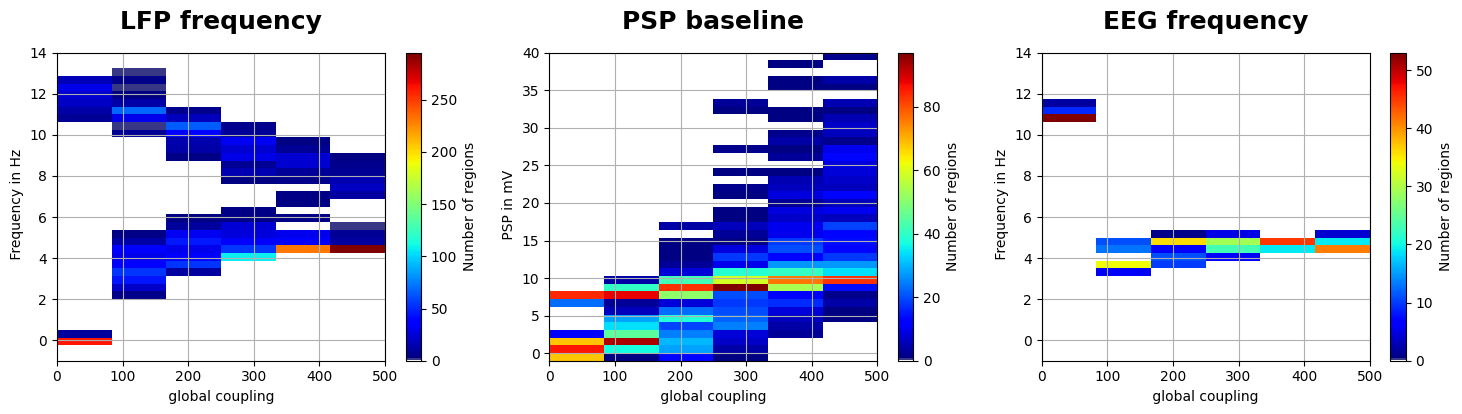

In [ ]:
histoplots()

Here, you see the spectral behavior of the system across the global coupling parameter G.

<Figure size 1800x400 with 0 Axes>

<Figure size 1800x400 with 0 Axes>

<Figure size 1800x400 with 0 Axes>

<Figure size 1800x400 with 0 Axes>

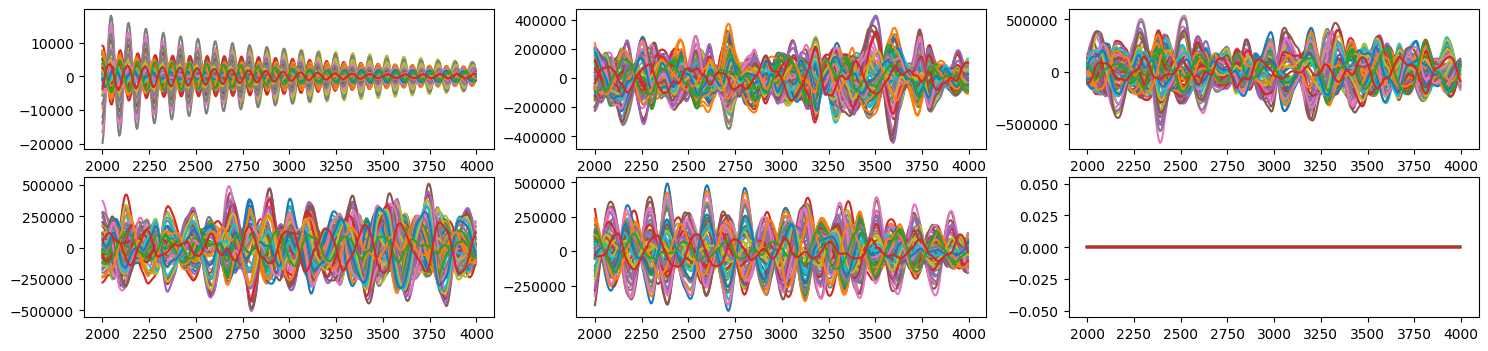

In [ ]:
EEGplots(1)

A few example timseries from different areas of the abovementioned parameter space exploration are provided here. As it can be seen, the system changes between different oscillatory behaviors.


**Translate model to a linear transfer function**

Now, as a summary of the above, you can try out to simplify the simulation above by using a linear transfer function insetad of the sigmoid. We have to make sure that the linear function has high similarity to the part of the sigmid between the asymptotes.

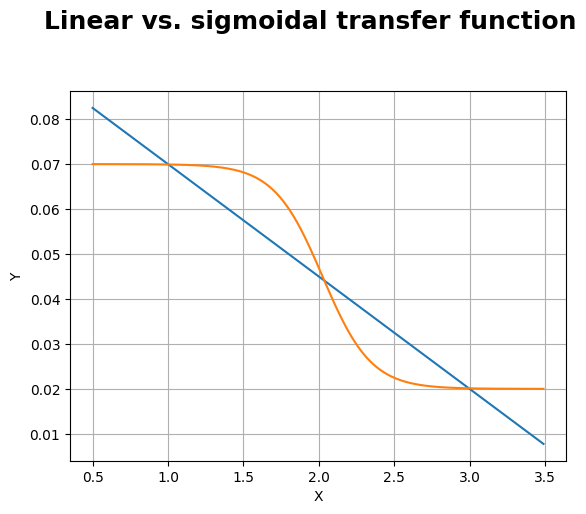

In [ ]:
# Selection of a  linear function with a similar behavior in the range of interest
# y(1) = 0.07
# y(2) = 0.02
# y = mx + c
b = transform_linear(abeta_burden, -0.025, 0.095)

a = np.arange(0.5,3.5,0.01)
plt.plot(a, transform_linear(a,-0.025, 0.095))
plt.plot(a, transform_sigmoid(a, y_max, y_min, x_1, x_2))
plt.xlabel("X")
plt.ylabel("Y")
plt.suptitle("Linear vs. sigmoidal transfer function", fontweight="bold", fontsize="18", y = 1.05)
plt.grid()
plt.show()

**Summary**

configure a simulation by using regional information
In the following, we will provide you similar code as in the examples above to use for your own cause-and-effect models

In [ ]:
INPUT=np.ones(379,)
y_min = 0.02
y_max  = 0.05
x_1 = 1.4
x_2 = 2.65
c = 0.001
transfer = transform_sigmoid(INPUT, y_max, y_min, x_1, x_2)
#Change to linear, reciprocal, logarithmic

#Select white matter connectivity
white_matter = connectivity.Connectivity.from_file('/content/03_Clinical/Stefanovski/Connectome/SC.zip')
white_matter.configure()

#Define monitor
subsample = simulator.monitors.SubSample(period=5)
subsample.configure()

#Saving options
save_timeseries_to_file = False
save_path = ""

#Intial conditions
init = np.random.rand(4000,6,SCnorm.shape[0],1);

#Neural Mass model selection and integration of information array to one variable
jrm = ExtendedJansenRit(v0=np.array(6), mu=mu, p_max=mu, p_min=mu,
                       b = np.array(transfer))

#Simulator configuration
sim = simulator.Simulator(  connectivity=white_matter,
                            model=jrm,
                            coupling=coupling.SigmoidalJansenRit(a=np.array(0.0)),
                            integrator=integrators.HeunDeterministic(dt=0.5),
                            conduction_speed=100,
                            monitors=[subsample],
                            initial_conditions = init,
                            simulation_length=4000.0)
sim.configure();

#Define range of G
gc_range = np.arange(0,100,20)

#Choose number of cores
n_cores = 4
p = mp.Pool(processes=n_cores)
results = p.map(run_sim, gc_range)
p.close()

2023-07-19 16:03:53,619 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 16:03:53,629 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 16:03:53,622 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 16:03:53,631 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2023-07-19 16:10:19,420 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration


## **Whole brain modeling for epilepsy diagnosis**

In this part we will explore how the virtual epileptic patient (VEP), a workflow that uses personalized brain models and machine learning methods, can be useful to  estimates of epileptogenic zone networks (EZNs) and to aid surgical strategies to treat drug-resistant focal epilepsy as demonstrated in [Wang et al. 2023](https://www.science.org/doi/abs/10.1126/scitranslmed.abp8982?utm_campaign=SciMag&utm_source=Twitter&utm_medium=ownedSocial&intcmp=trendmd-stm) & [Jirsa et al.2014](https://academic.oup.com/brain/article/137/8/2210/2847958)

**A. Exploring the Epileptor model**

![alt](https://www.medrxiv.org/content/medrxiv/early/2022/01/21/2022.01.19.22269404/F1.large.jpg?width=800&height=600&carousel=1)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import re
def seeg_ch_name_split(nm):
    """
    Split an sEEG channel name into its electrode name and index
    >>> seeg_ch_name_split('GPH10')
    ('GPH', 10)
    """
    try:
        elec, idx = re.match(r"([A-Za-z']+)(\d+)", nm).groups()
    except AttributeError as exc:
        return None
    return elec, int(idx)

def bipolarize_gain_minus(gain, seeg_xyz, seeg_xyz_names,is_minus=True):
    #from icdc import seeg_ch_name_split
    split_names = [seeg_ch_name_split(el) for el in seeg_xyz_names]
    bip_gain_rows = []
    bip_xyz = []
    bip_names = []
    for i in range(len(split_names) - 1):
        try:
            name, idx = split_names[i]
            next_name, next_idx = split_names[i + 1]
            if name == next_name:
                if is_minus:
                    bip_gain_rows.append(gain[i + 1] - gain[i])
                else:
                    bip_gain_rows.append((gain[i + 1] + gain[i]) / 2.0)
                bip_xyz.append(
                    [(p + q) / 2.0 for p, q in zip(seeg_xyz[i][1], seeg_xyz[i + 1][1])]
                )
                bip_names.append("%s%d-%d" % (name, idx, next_idx))
        except Exception as exc:
            print(exc)
    # abs val, envelope/power always postive
    bip_gain = np.abs(np.array(bip_gain_rows))
    bip_xyz = np.array(bip_xyz)
    return bip_gain, bip_xyz, bip_names

# Plot time series
def plot_ts(t, y):
    # Normalize the time series to have nice plots
    y /= (np.max(y, 0) - np.min(y, 0))
    y -= np.mean(y, 0)

    plt.figure(figsize=(10,10))
    plt.plot(t[:], y[:, 0, :, 0] + 6, 'C3', label='x1')
    plt.plot(t[:], y[:, 1, :, 0] + 4.5, 'C1', label='y1')
    plt.plot(t[:], y[:, 2, :, 0] + 3, 'C4', label='x2')
    plt.plot(t[:], y[:, 3, :, 0] + 1.5, 'C7', label='y2')
    plt.plot(t[:], y[:, 4, :, 0], 'C2', label='z')
    plt.title("Epileptors time series", fontsize=15)
    plt.xlabel('Time [ms]', fontsize=15)
    plt.legend()
    #yticks(np.arange(len(labels)), labels, fontsize=15)
    plt.show()

def plot_ts_3d(t, y):
    # Normalize the time series to have nice plots
    y /= (np.max(y, 0) - np.min(y, 0))
    y -= np.mean(y, 0)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(y[:, 2, 0, 0]-y[:, 0, 0, 0], y[:, 1, 0, 0], y[:, 4, 0, 0], linewidth = 0.4)
    ax.set_xlabel('x2-10*x1', size=7)
    ax.set_ylabel('y2', size=7)
    ax.set_zlabel('z', size=7)
    ax.set_title('Epileptor time series in 3D')
    plt.show()

# @title Functions taken from Wang et al. 2023 Science Translational Medicine

In [6]:
## First step : importing libraries
from tvb.simulator.lab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import time as tm

# @title Importage


The epilesy can be modelled in TVB using the epileptor model by [Jirsa et al.2014](https://academic.oup.com/brain/article/137/8/2210/2847958)

The two dynamics that the epileptor model can represent are: <br/>
1) **A saddle-node bifurcation:** a type of critical point or bifurcation in dynamical systems theory. It occurs when a stable equilibrium (or fixed point) and an unstable equilibrium collide and annihilate each other. <br/>
2) **A saddle homoclinic bifurcation:** a type of bifurcation that occurs in dynamical systems when a saddle point of the system collides with its own unstable manifold (homoclinic orbit).<br/>


To understand these bifurcations better, let's break it down step by step:
- Saddle Point: In a dynamical system, a saddle point is an equilibrium point that has a stable manifold and an unstable manifold. The stable manifold contains trajectories that converge towards the saddle point in the future, while the unstable manifold contains trajectories that diverge from the saddle point in the future.
- Homoclinic Orbit: A homoclinic orbit is a trajectory that connects the saddle point to itself, both forwards and backwards in time.
- Homoclinic Bifurcation: During a saddle homoclinic bifurcation, as a parameter in the dynamical system is varied, the stable and unstable manifolds of the saddle point gradually change. When a critical value of the parameter is reached, the stable and unstable manifolds intersect, and the homoclinic orbit is born. This occurs due to the saddle point and its homoclinic orbit coming together in phase space.

The epileptor model is a phenomenological model composed by 5 states variables.<br/>
<br/>
\begin{equation}
\dot{x_{1}} = y_{1} - f_{1}(x_{1},x_{2}) -z + I_{ext1} \\
\dot{y_{1}} = c-dx^2_{1} -y_{1} \\
\dot{x_{2}} = -y_{2} + x_{2} - x^3_{2} + I_{ext2} + 0.002g -0.3(z-3.5)\\
\dot{y_{2}} = \frac{1}{\tau(y_{2} + f_{2}x_{2})} \\
\dot{z} = r(4(x_{1} - x_{0})- z) +  f_{3}(z) + K\sum_{j=1}^N C_{ij} (x^j_{1} - x^i_{1}) \ \\
\dot{g} = -0.01(g-0.1 x_{1}) \\
\end{equation}
<br/>


The $x_{1}$ population displays seizure activity characterized by low voltage fast discharges.

The $x_{2}$ population reproduce the presence of interictal spike and wave events which is common in epilepsy.

In epilepsy, there are two states: the ictal state (representing the actual seizure state) and the interictal state, during which the patient is in a "normal state." So in our system the patient must be able to switch between one state to the other. For accounting this transition between these states, we rely on the $z$ variable, which facilitates the switch from the interictal state to the ictal state.

One important variable in the model is the $x_{0}$ which determines if our system is going to trigger a seizure or if it is in resting-state.
When the variable remains below a specific threshold, the system exists in a fixed-point state *(healthy state)*. However, once the threshold is surpassed, it triggers a seizure *(epileptogenicity state)*.

The output of the epileptor is a $x_{2} - x_{1}$ which means that is the output of the two part of the epileptor: low voltage fast discharges and the spike and wave.




In [7]:
# Data
data_path = '/content/03_Clinical/Dollomaja'

os.chdir(data_path)

#### **Generate Synthetic Data**

In [9]:
Nt, Tend, sigma = 1000,100.0, 1e-1
dt=Tend/Nt
t0=0.0
Ts = arange(dt,Tend+dt,dt)

tau0=10.
I1=3.1

x_0 =-1.5

x, z= np.zeros(Nt), np.zeros(Nt)
xs, zs= np.zeros(Nt), np.zeros(Nt)

x_init, z_init=-2.5, 3.5

x[0],z[0]=x_init, z_init

for t in range(Nt-1):
    dx =1.0 - x[t]**3 - 2.0*x[t]**2 - z[t] + I1
    dz =(1.0/tau0)*(4*(x[t]-x_0) - z[t])
    x[t+1]=(x[t] + dt * dx + sqrt(dt) *sigma * randn())
    z[t+1]=(z[t] + dt * dz + sqrt(dt) *sigma * randn())

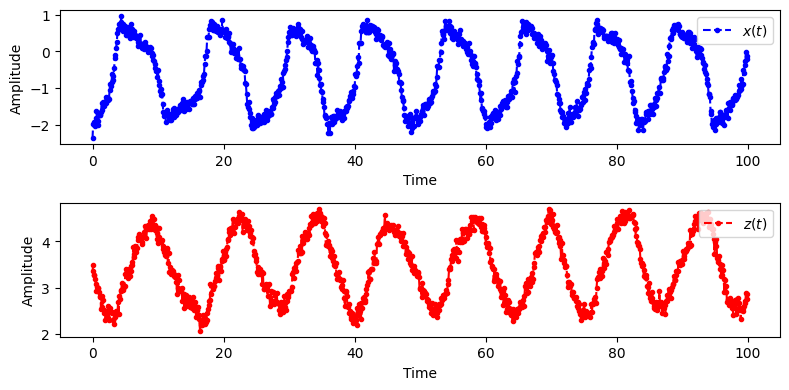

In [10]:
xs,zs = x+sigma*randn(x.size), array(z)+sigma*randn(z.size)
obs= array([xs, zs]).transpose()
ts = dt*np.r_[:xs.shape[0]]

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(ts,(obs[:,0]) , '--b.', label='$x(t)$')
plt.xlabel('Time'); plt.ylabel('Amplitude');
plt.legend(loc='upper right')
plt.tight_layout();
plt.subplot(212)
plt.plot(ts, obs[:,1], '--r.', label='$z(t)$')
plt.xlabel('Time'); ylabel('Amplitude');
plt.legend(loc='upper right')
plt.tight_layout();
plt.show()

In [11]:
def Epileptor2D(Nt, dt, f_decim, x_init, z_init, tau0, eta_true):
    xs, zs = [x_init], [z_init]

    for i in range(Nt-1):
        x, z = xs[-1], zs[-1]
        dx =1.0 - x**3 - 2.0*x**2 - z + I1
        dz =(1.0/tau0)*(4*(x-eta_true) - z)
        xs.append(x + dt * dx + sqrt(dt) * sigma * randn())
        zs.append(z + dt * dz + sqrt(dt) * sigma * randn())

    xs,zs = array(xs), array(zs)

    xs,zs = array(xs)+sigma*randn(xs.size), array(zs)+sigma*randn(zs.size)

    obs= array([xs, zs]).transpose()
    ts = dt*r_[:xs.shape[0]]

    obs_decim, ts_decim= obs[::f_decim], ts[::f_decim]

    return ts_decim, obs_decim

def nullclines(X,Y, x_0, tau0):
    dX =  1.0 - X**3 - 2.0*X**2 - Y + I1
    dY =  (1.0/tau0)*(4*(X-x_0) - Y)
    contour(X, Y, dX, 0, colors='r')
    contour(X, Y, dY, 0, colors='b')


def root_fuc(roots, x_0, tau0):
    x = empty(1)
    z = empty(1)
    F = empty(2)
    x = roots[0]
    z = roots[1]
    F[0] =1.0 - x**3 - 2.0*x**2 - z + I1
    F[1] =(1.0/tau0)*(4*(x-x_0) - z)
    return F

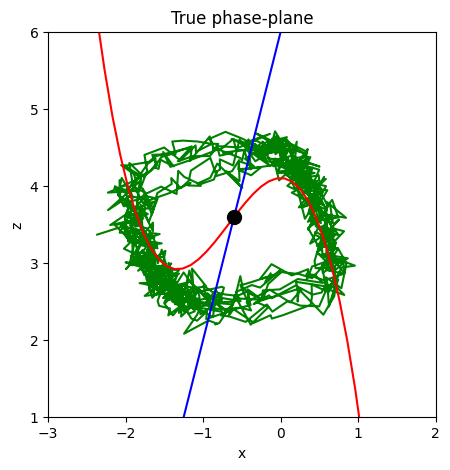

In [12]:
f_decim=1
obs_decim, ts_decim= obs[::f_decim], ts[::f_decim]
Ts_decim = np.arange(dt,Tend+dt,dt*f_decim)

rGuess=array([[-1.,3.]])
true_roots = fsolve(root_fuc,rGuess, args=(x_0, tau0))

X, Z = mgrid[-5.0:5.0:100j, 0.0:10.0:100j]

plt.figure(figsize=(5, 5))
plt.plot(obs_decim[:,0], obs_decim[:,1], 'g')
nullclines(X,Z,  x_0, tau0)
plt.plot(true_roots[0],true_roots[1] , marker="o", markersize=10, color='k')
plt.xlabel('x'); plt.ylabel('z');
plt.title('True phase-plane')
plt.xlim((-3,2)), plt.ylim((1,6))
plt.show()



Different Value of $x_{0}$

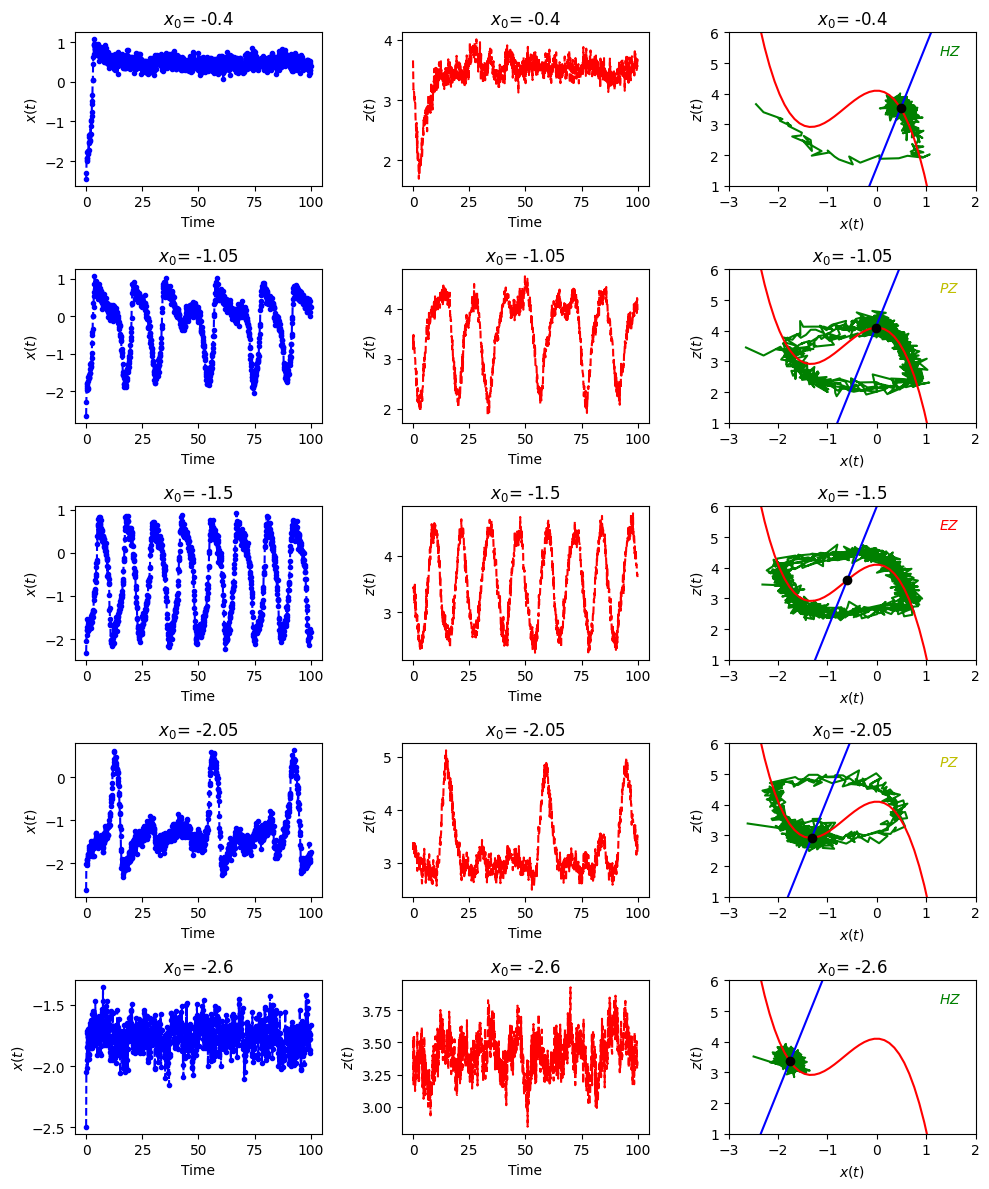

In [14]:
rGuess=array([[-1.,3.]])
X, Z = mgrid[-5.0:5.0:100j, 0.0:10.0:100j]

plt.figure(figsize=(10, 12))

for idx, x_0_val in enumerate([-.4, -1.05, -1.5, -2.05, -2.6]):
        ts_decim, obs_decim=Epileptor2D(Nt, dt, f_decim, x_init, z_init, tau0, x_0_val)
        plt.subplot(5,3,3*idx+1)
        plot(ts_decim, obs_decim[:,0], '--b.')
        plt.xlabel('Time'); plt.ylabel(r'$x(t)$');
        plt.title('$x_{0}$= %s' %x_0_val)
        plt.subplot(5,3,3*idx+2)
        plot(ts_decim, obs_decim[:,1], '--r')
        plt.xlabel('Time'); plt.ylabel(r'$z(t)$');
        plt.title('$x_{0}$= %s' %x_0_val)
        plt.subplot(5,3,3*idx+3)
        plot(obs_decim[:,0], obs_decim[:,1], 'g')
        true_roots = fsolve(root_fuc,rGuess, args=(x_0_val, tau0))
        nullclines(X,Z,  x_0_val, tau0)
        plt.plot(true_roots[0],true_roots[1] , marker="o", markersize=6, color='k')
        plt.xlim((-3,2)), plt.ylim((1,6))
        plt.xlabel(r'$x(t)$'); plt.ylabel(r'$z(t)$');
        plt.title('$x_{0}$= %s' %x_0_val)

        if -2.05<x_0_val<-1.05:
            plt.text(1.25, 5.25, r'$EZ$', color='r')
        elif -2.5<=x_0_val<=-2.05 or -1.05<=x_0_val<=-.5:
            plt.text(1.25, 5.25, r'$PZ$', color='y')
        else:
            plt.text(1.25, 5.25, r'$HZ$', color='g')
plt.tight_layout()

**Implement the Epileptor in TVB**

In [15]:
def implement_sim_and_run(x0=-1.6, simulation_length=10000):
    epileptormod = models.Epileptor()
    epileptormod.x0 = np.ones((1)) * x0
    epileptormod.variables_of_interest = ['x1', 'y1', 'x2', 'y2', 'z']

    n=1
    conn = np.zeros((n, n))
    dist = np.r_[:n * n].reshape((n, n))
    dist = np.array(dist, dtype=float)

    init_cond = np.array([-1.98742113e+00 , -1.87492138e+01, 4.0529597e+00, -1.05214059e+00, -4.95543740e-20, -1.98742113e-01])
    init_cond_reshaped = np.repeat(init_cond, n).reshape((1, len(init_cond), n, 1))


    sim = simulator.Simulator(model=epileptormod,
                              initial_conditions=init_cond_reshaped,
                              connectivity=connectivity.Connectivity(region_labels=np.array(['']),weights=conn,
                                                                     tract_lengths=dist, speed=np.array([1.0]),
                                                                     centres=np.array([0.0])),
                              coupling=coupling.Difference(a=np.array([-0.2])),
                              integrator=integrators.HeunDeterministic(dt=0.05),
                              monitors=(monitors.TemporalAverage(period=1.),))
    sim.configure()

    print("Starting simulation...")
    tic = tm.time()
    (t, y), = sim.run(simulation_length=simulation_length)
    print("Finished simulation.")
    print('execute for ' + str(tm.time()-tic))
    return t,y

Starting simulation...
2023-07-21 19:17:54,110 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 48.73790979385376


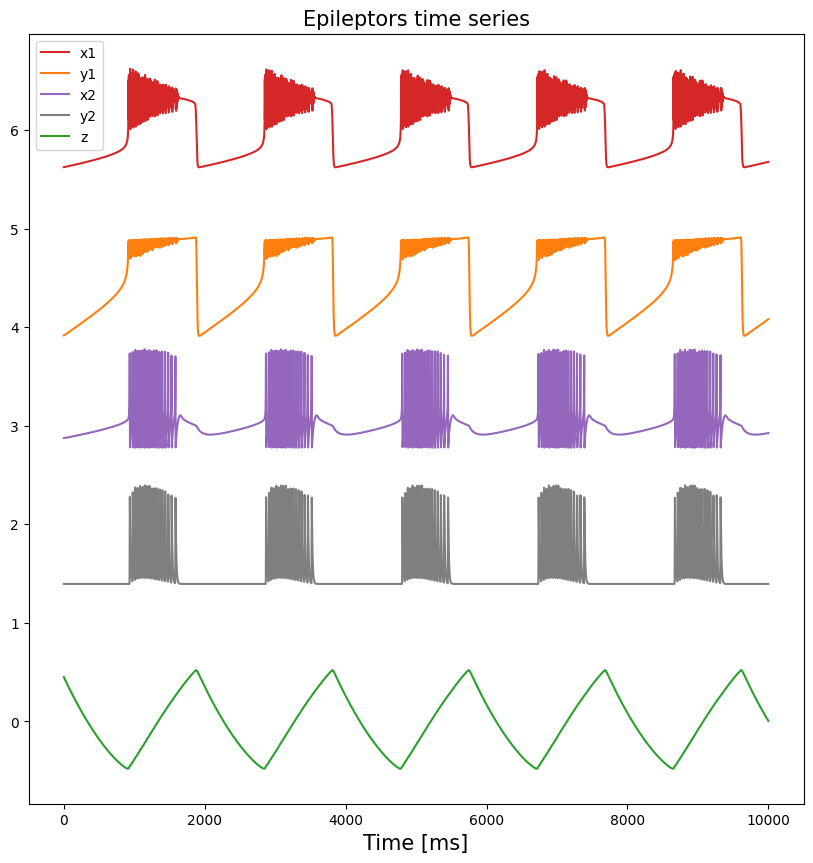

In [16]:
t,y = implement_sim_and_run()
plot_ts(t, y)

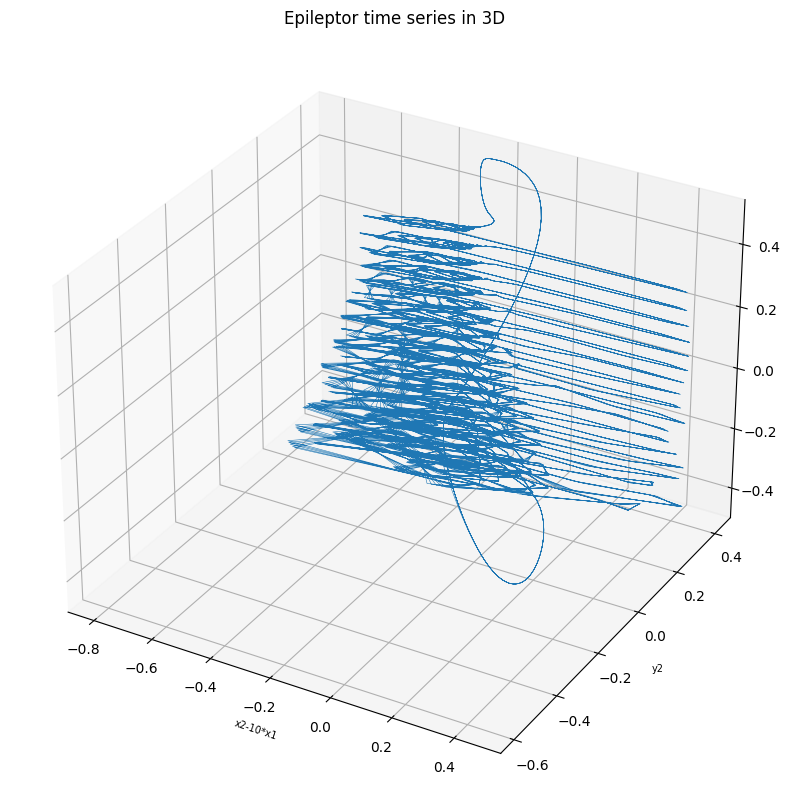

In [17]:
plot_ts_3d(t, y)

In [18]:
simulation_length = 8000
t_vec = []
y_vec = []
for x0 in [2.8, 2.1, 1.9, 1.5, 1]:
    print(x0)
    t,y = implement_sim_and_run(-x0, simulation_length)
    t_vec.append(t)
    y_vec.append(y)

2.8
Starting simulation...
2023-07-21 19:18:43,595 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 35.018035650253296
2.1
Starting simulation...
2023-07-21 19:19:18,618 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 39.78434896469116
1.9
Starting simulation...
2023-07-21 19:19:58,411 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 35.29886031150818
1.5
Starting simulation...
2023-07-21 19:20:33,716 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 40.14355731010437
1
Starting simulation...
2023-07-21 19:21:13,866 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 38.02725911140442


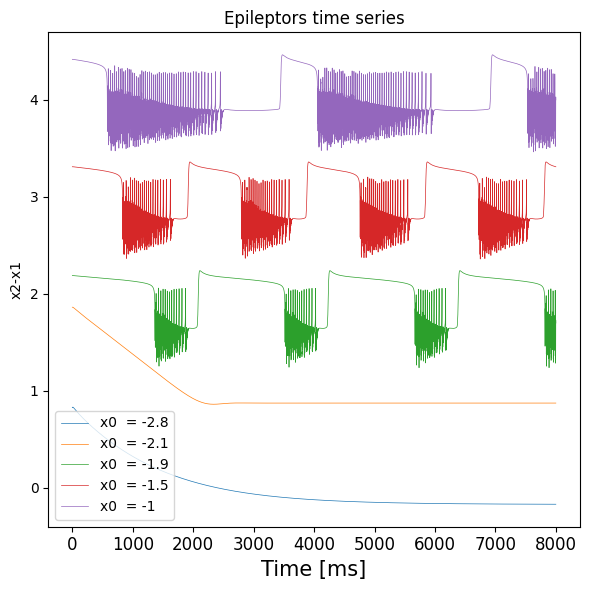

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
for idx, b in enumerate([2.8, 2.1, 1.9, 1.5, 1]):
    tavg = y_vec[idx]
    srcSig = tavg[:,2,:,0] - tavg[:,0,:,0]

    # Normalize the time series to have nice plots
    srcSig /= (np.max(srcSig, 0) - np.min(srcSig, 0))
    srcSig_normal = srcSig - np.mean(srcSig, 0)

    plt.xlabel('Time [ms]', fontsize=15)
    plt.ylabel('x2-x1')

    plt.plot(t[:],srcSig_normal[:] + idx, label='x0  = -' + str(round(b,2)), lw=0.5)
    plt.title("Epileptors time series")

    plt.xticks(fontsize=12)
    # plt.ylim([-1,len(roi)+0.5])
    # plt.xlim([t[0],t[-1]])
    plt.tight_layout()
    # plt.title(f'{pid}')

plt.legend()
plt.show()

**B. Region based simulation of a temporal lobe seizure**

***1. Initialize connectivities, model, coupling, integrators and monitors***

In [20]:
# Connectivity
con = connectivity.Connectivity.from_file(f'{data_path}/connectivity.vep.zip')
con.tract_lengths = np.zeros((con.tract_lengths.shape))             # no time-delays
con.weights[np.diag_indices(con.weights.shape[0])] = 0
# con.weights = np.log(con.weights+1)
con.weights /= con.weights.max()
con.configure()
nb_regions = con.number_of_regions
con

2023-07-21 19:21:52,756 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


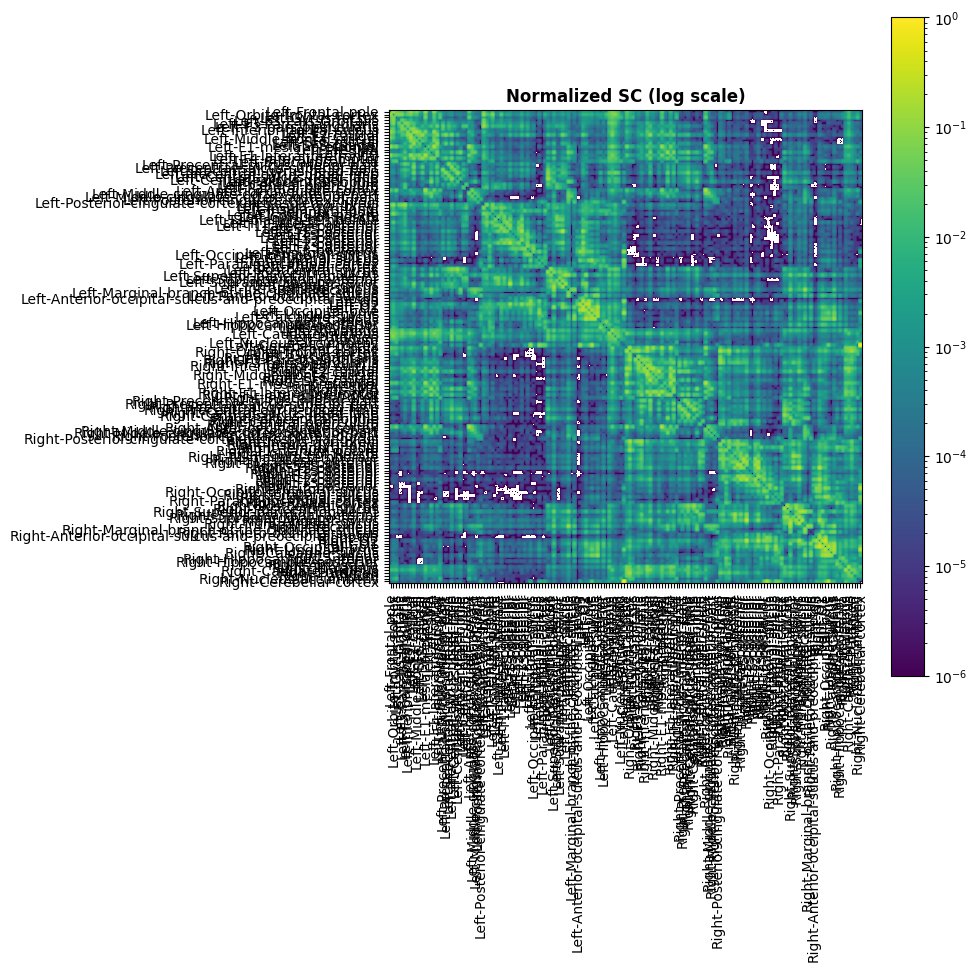

In [21]:
SC = con.weights
roi = con.region_labels
fig = plt.figure(figsize=(10,10))
plt.imshow(SC,norm=plc.LogNorm(vmin=1e-6, vmax=SC.max()))
plt.title(f'Normalized SC (log scale)',fontsize=12, fontweight='bold')
plt.xticks(np.r_[:len(roi)], roi, rotation = 90)
plt.yticks(np.r_[:len(roi)], roi)
plt.colorbar()
fig.tight_layout()

 Now that we have our connectivity we can introduce some anomalities and heteroteneity to our network for:
-  **Epileptogenic Zone (EZ):** the hypothetical area in the brain responsible for the origin and early organization of the epileptic activity
- **The Propagation Zone (PZ):** comprises areas that are recruited during the seizure evolution, but are by themselves not epileptogenic.<br/>
<br/>

![alt](https://ars.els-cdn.com/content/image/1-s2.0-S1053811916300891-gr1.jpg)

<br/>

For further details on how to estimate this heterogeity please see [Bartolomei et al., 2013](https://epjnonlinearbiomedphys.springeropen.com/articles/10.1140/epjnbp11)

In [58]:
x0ez=-1.2
x0pz=-1.6
x0num=-2.5

#ezind = 0
ROI = [0, 10, 20, 30, 40, 60, 65, 100, 110]
EZ = ['Right-Hippocampus-anterior']
PZ = ['Right-Hippocampus-posterior', 'Right-Rhinal-cortex', 'Right-T3-anterior', 'Left-Hippocampus-anterior', 'Left-Temporal-pole']
idx_EZ = np.where(roi == EZ)
idx_PZ = [np.where(roi == pz) for pz in PZ]

epileptors = models.Epileptor(r=np.array([0.00035]))
epileptors.x0 = x0num*np.ones(nb_regions)
epileptors.x0[idx_EZ] = x0ez
for id in idx_PZ:
    epileptors.x0[id] = x0pz
    x0pz -= 0.1

In [23]:
# Coupling
coupl = coupling.Difference(a=np.array([-0.2]))

# Integrators
heunint = integrators.HeunDeterministic(dt=0.05)

# Monitors
mons = [monitors.TemporalAverage(period=3)]

***2. Set up simulator, run and visualize results***

In [51]:
# Initial conditions
init_cond = np.array([-1.98742113e+00 , -1.87492138e+01, 4.0529597e+00, -1.05214059e+00, -4.95543740e-20, -1.98742113e-01])
print(init_cond)
init_cond_reshaped = np.repeat(init_cond, nb_regions).reshape((1, len(init_cond), nb_regions, 1))

# Simulator
sim = simulator.Simulator(model=epileptors,
                          initial_conditions=init_cond_reshaped,
                          connectivity=con,
                          coupling=coupl,
                          integrator=heunint,
                          monitors=mons)

sim.configure()

# Run
print("Starting simulation...")
tic = tm.time()
simulation_length = 6000
ttavg = sim.run(simulation_length=simulation_length)
print("Finished simulation.")
print('execute for ' + str(tm.time()-tic))

[-1.98742113e+00 -1.87492138e+01  4.05295970e+00 -1.05214059e+00
 -4.95543740e-20 -1.98742113e-01]
Starting simulation...
2023-07-21 19:53:27,973 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 239.9383773803711


In [52]:
t, tavg = ttavg[0]

In [53]:
tavg.shape

(2000, 2, 162, 1)

In [54]:
tts = ttavg[0][0]
tavg = ttavg[0][1]
srcSig = tavg[:,0,:,0]

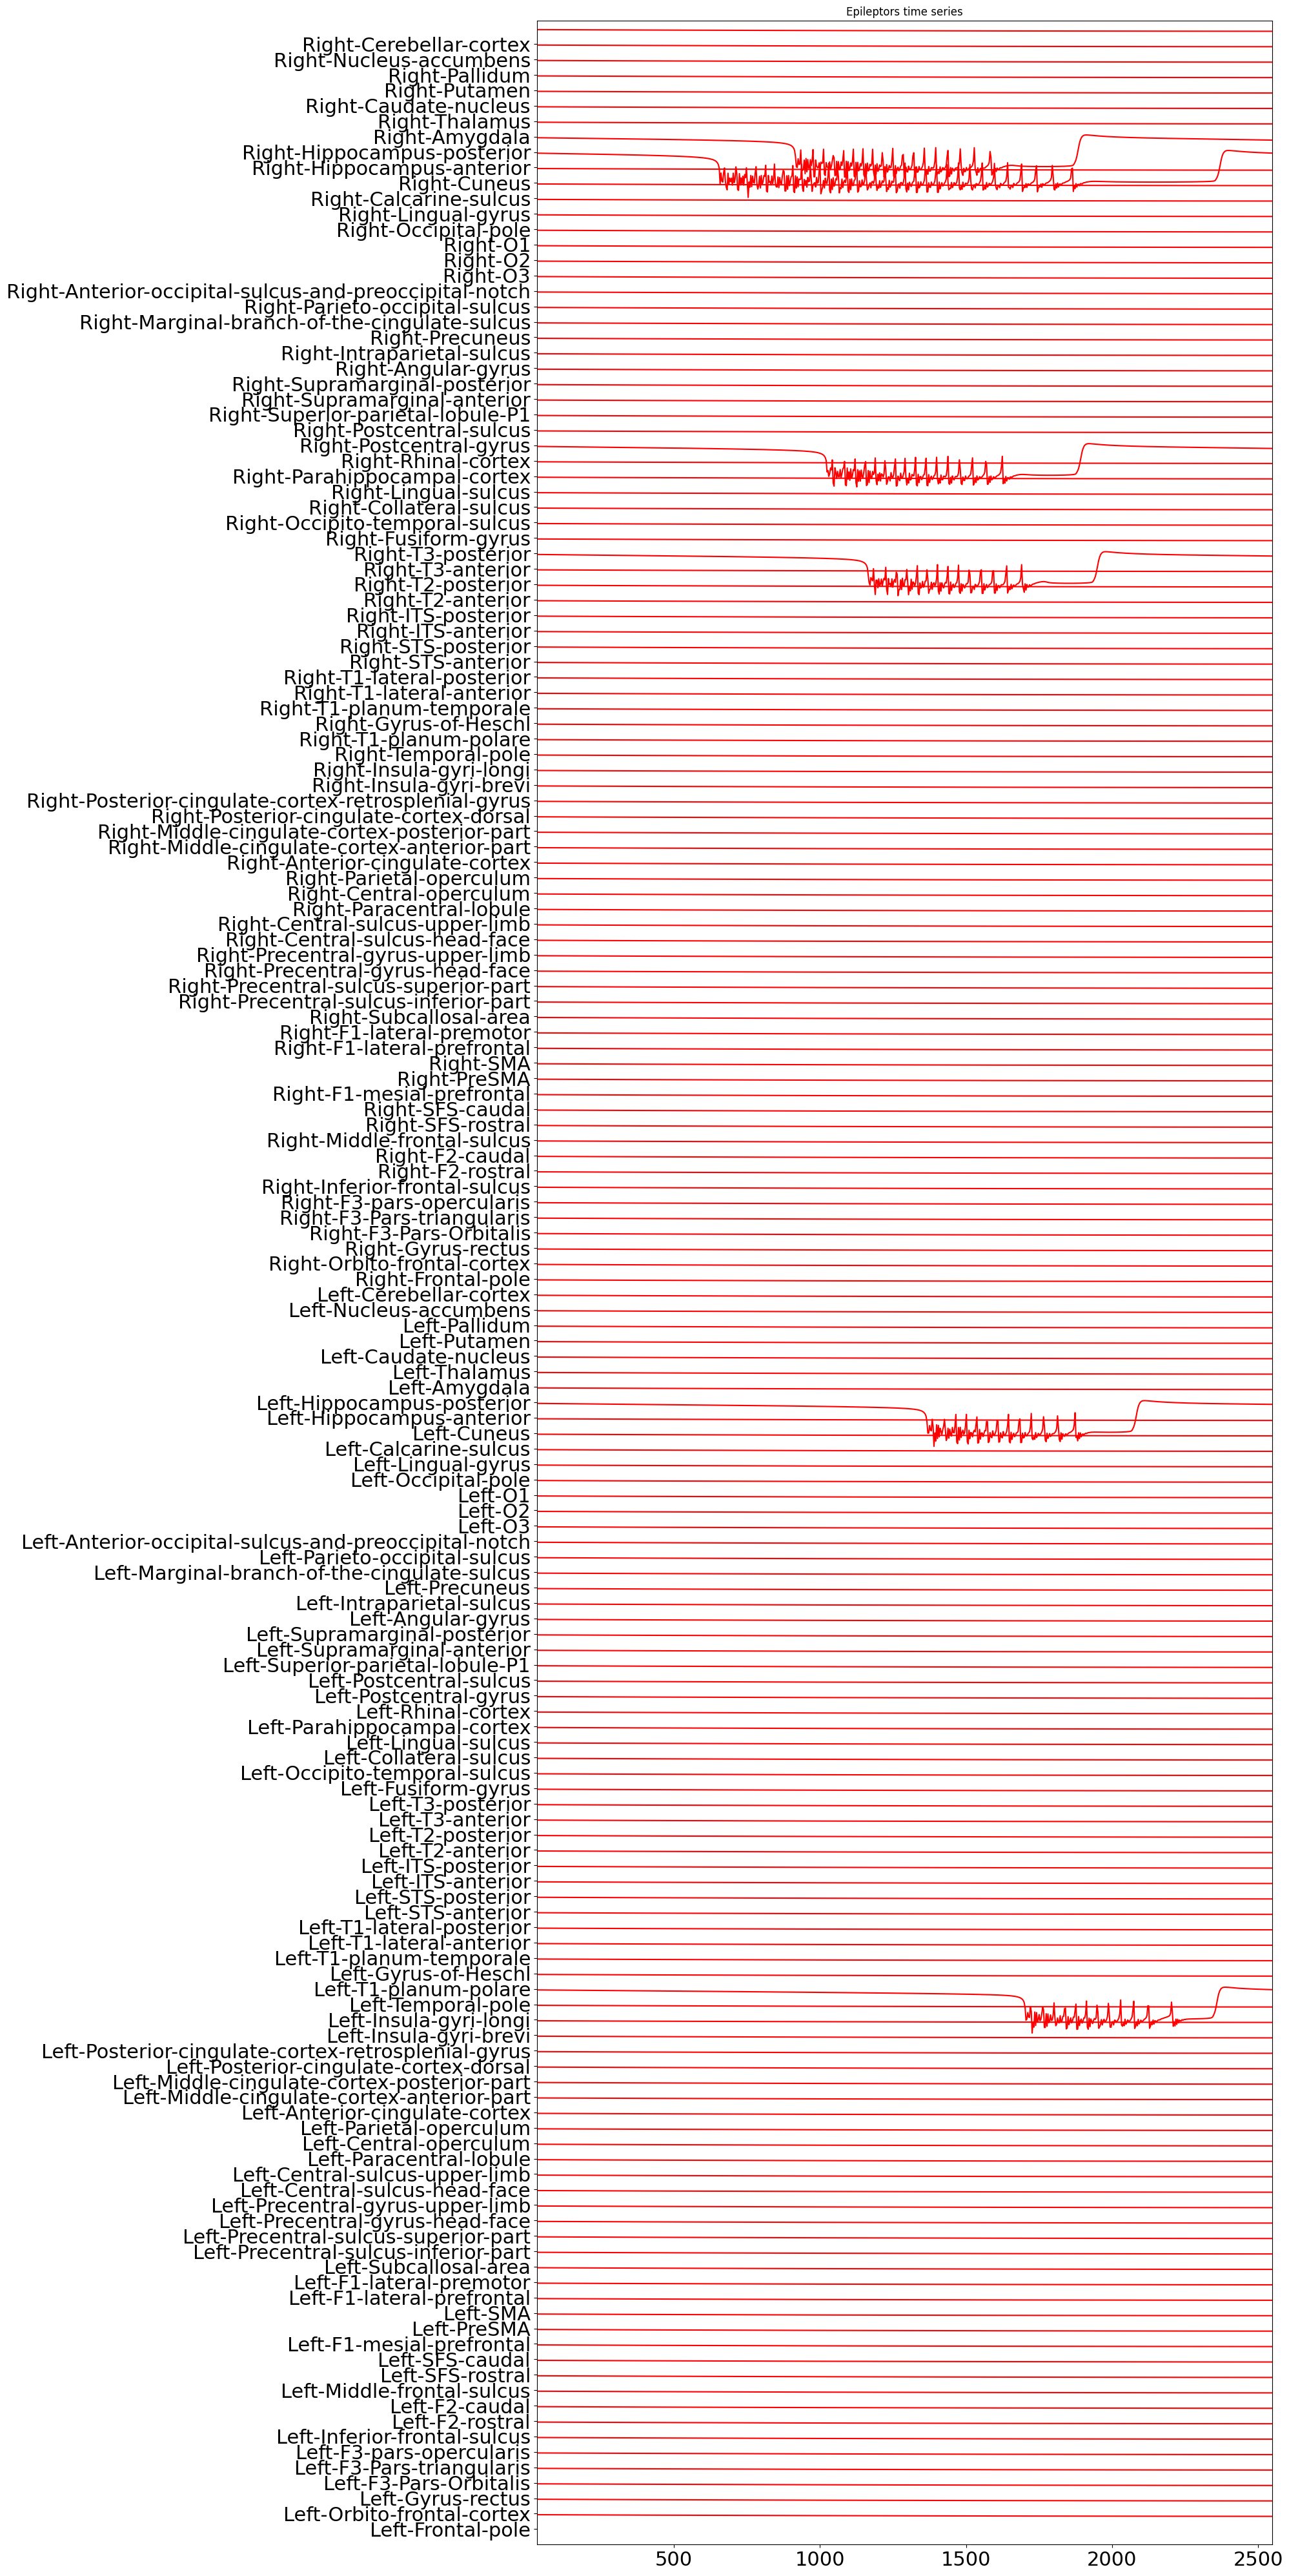

In [99]:
%matplotlib inline
start_idx = 10
end_idx = 850

srcSig_normal=srcSig/np.ptp(srcSig)
#Plot raw time series
figure= plt.figure(figsize=(20,40))
plt.plot(tts[start_idx:end_idx],srcSig[start_idx:end_idx] + np.r_[:162], 'r')
plt.title("Epileptors time series")
roi = con.region_labels
plt.yticks(np.arange(len(roi)),roi, fontsize=22);

plt.xticks(fontsize=22)
plt.ylim([-1,len(roi)+0.5])
plt.xlim([tts[start_idx],tts[end_idx-1]])
plt.tight_layout()
plt.show()

Visualizing only the regions where the seizure is orginating and propagating

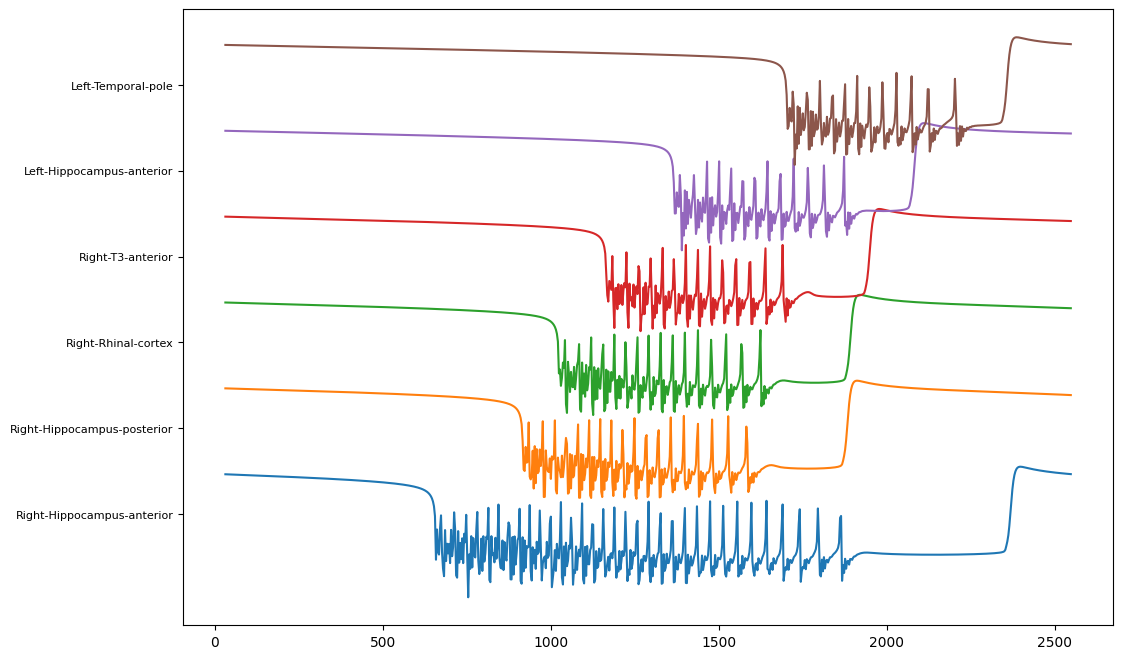

In [91]:
region2plot = np.concatenate([np.array(idx_EZ).flatten(), np.array(idx_PZ).flatten()])



plt.figure(figsize=(12,8))
for i in range(region2plot.shape[0]):
  plt.plot(tts[start_idx:end_idx], srcSig[start_idx:end_idx, region2plot[i]] + 2*i)


plt.yticks(np.arange(region2plot.shape[0]) * 2, roi[region2plot], fontsize=8);



***3. Map timeseries onto SEEG using the gain matrix***

In [29]:
# Reading the reconstructed SEEG data
seeg_xyz_file = f'{data_path}/seeg.xyz'
seeg_xyz = []
with open(seeg_xyz_file, 'r') as fd:
    for line in fd.readlines():
        name, *sxyz = line.strip().split()
        xyz = [float(_) for _ in sxyz]
        seeg_xyz.append((name, xyz))

seeg_xyz_names = [label for label, _ in seeg_xyz]

In [30]:
# Reading the gain matrix file
inv_gain_file = f'{data_path}/gain_inv-square.vep.txt'
invgain = np.loadtxt(inv_gain_file)

bip_gain, bip_xyz, bip_names = bipolarize_gain_minus(invgain, seeg_xyz, seeg_xyz_names)
bip_gain_inv_prior, _, _ =  bipolarize_gain_minus(invgain, seeg_xyz, seeg_xyz_names, is_minus=False)

In [31]:
bip_gain.shape

(154, 162)

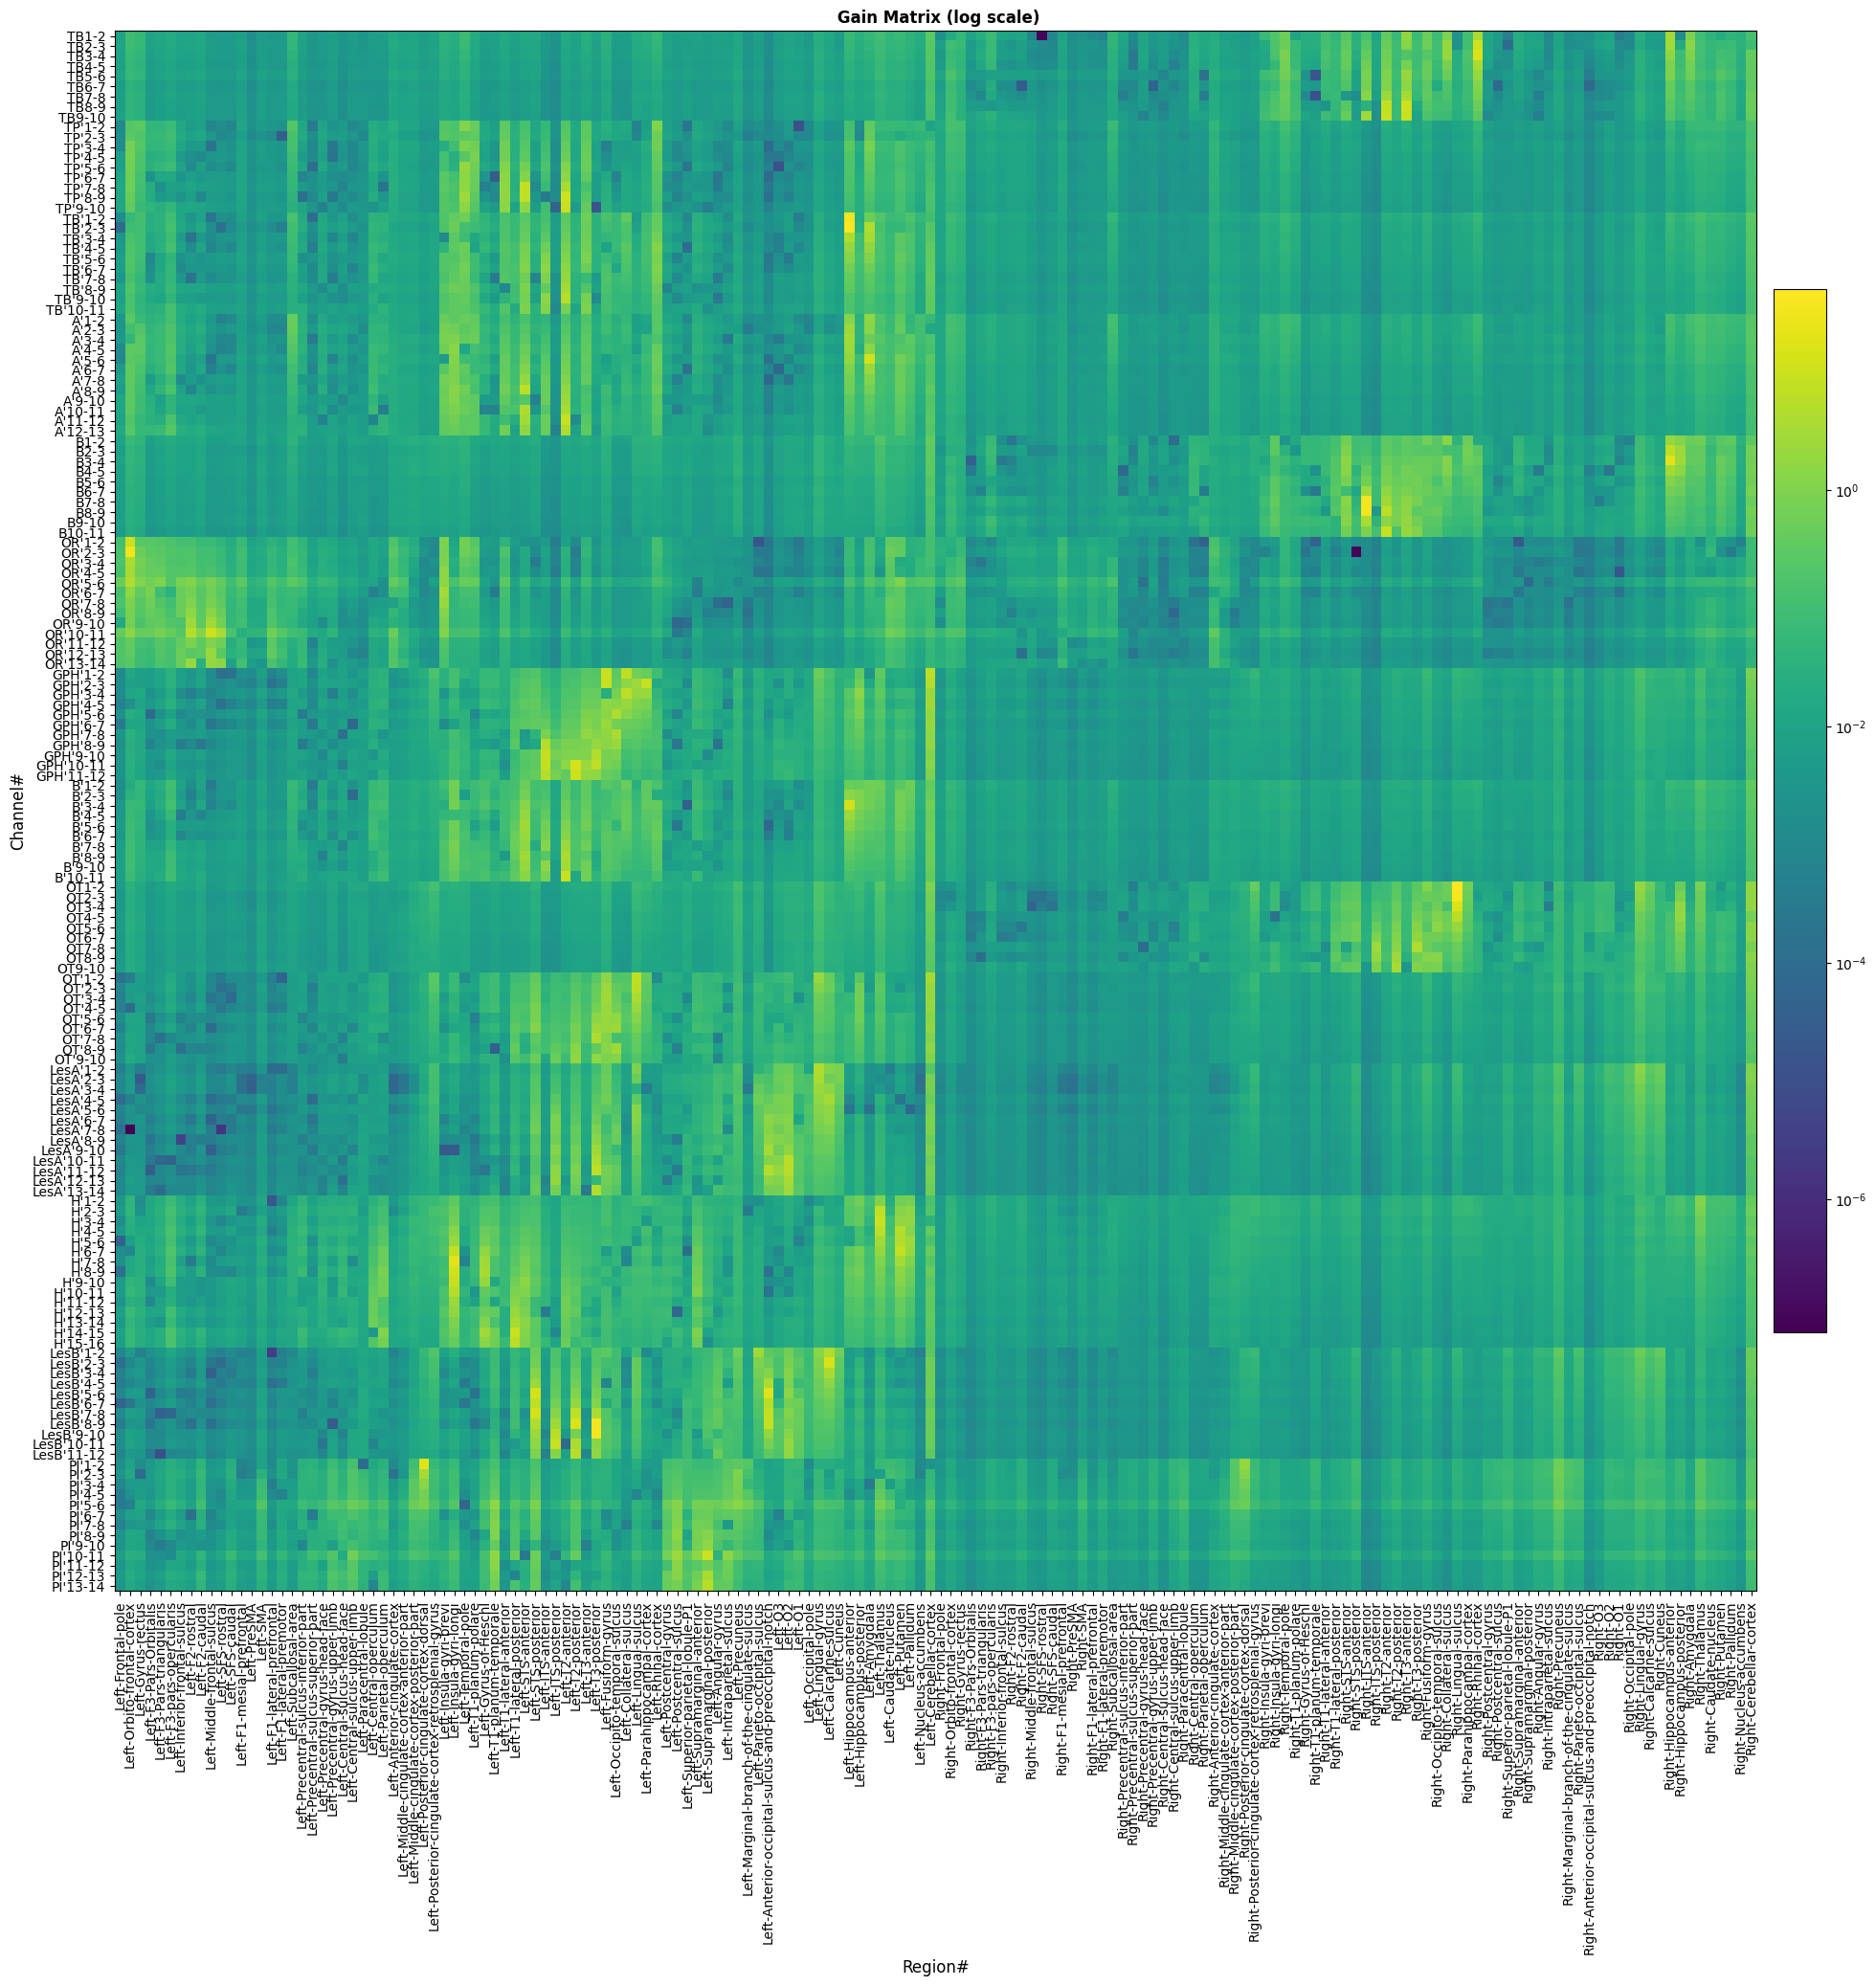

In [32]:
# Gain matrix
gain = bip_gain
nsensor, nchan = np.shape(gain)
fig = plt.figure(figsize=(20,20))
im = plt.imshow(gain,norm=plc.LogNorm(vmin=gain.min(), vmax=gain.max()))
plt.xticks(np.r_[:len(roi)], roi, rotation = 90)
plt.yticks(np.r_[:len(bip_names)], bip_names)
plt.xlabel('Region#', fontsize=12)
plt.ylabel('Channel#', fontsize=12)
plt.title(f' Gain Matrix (log scale)',fontsize=12, fontweight='bold')
plt.colorbar(im, fraction=0.03, pad=0.01)
fig.tight_layout()

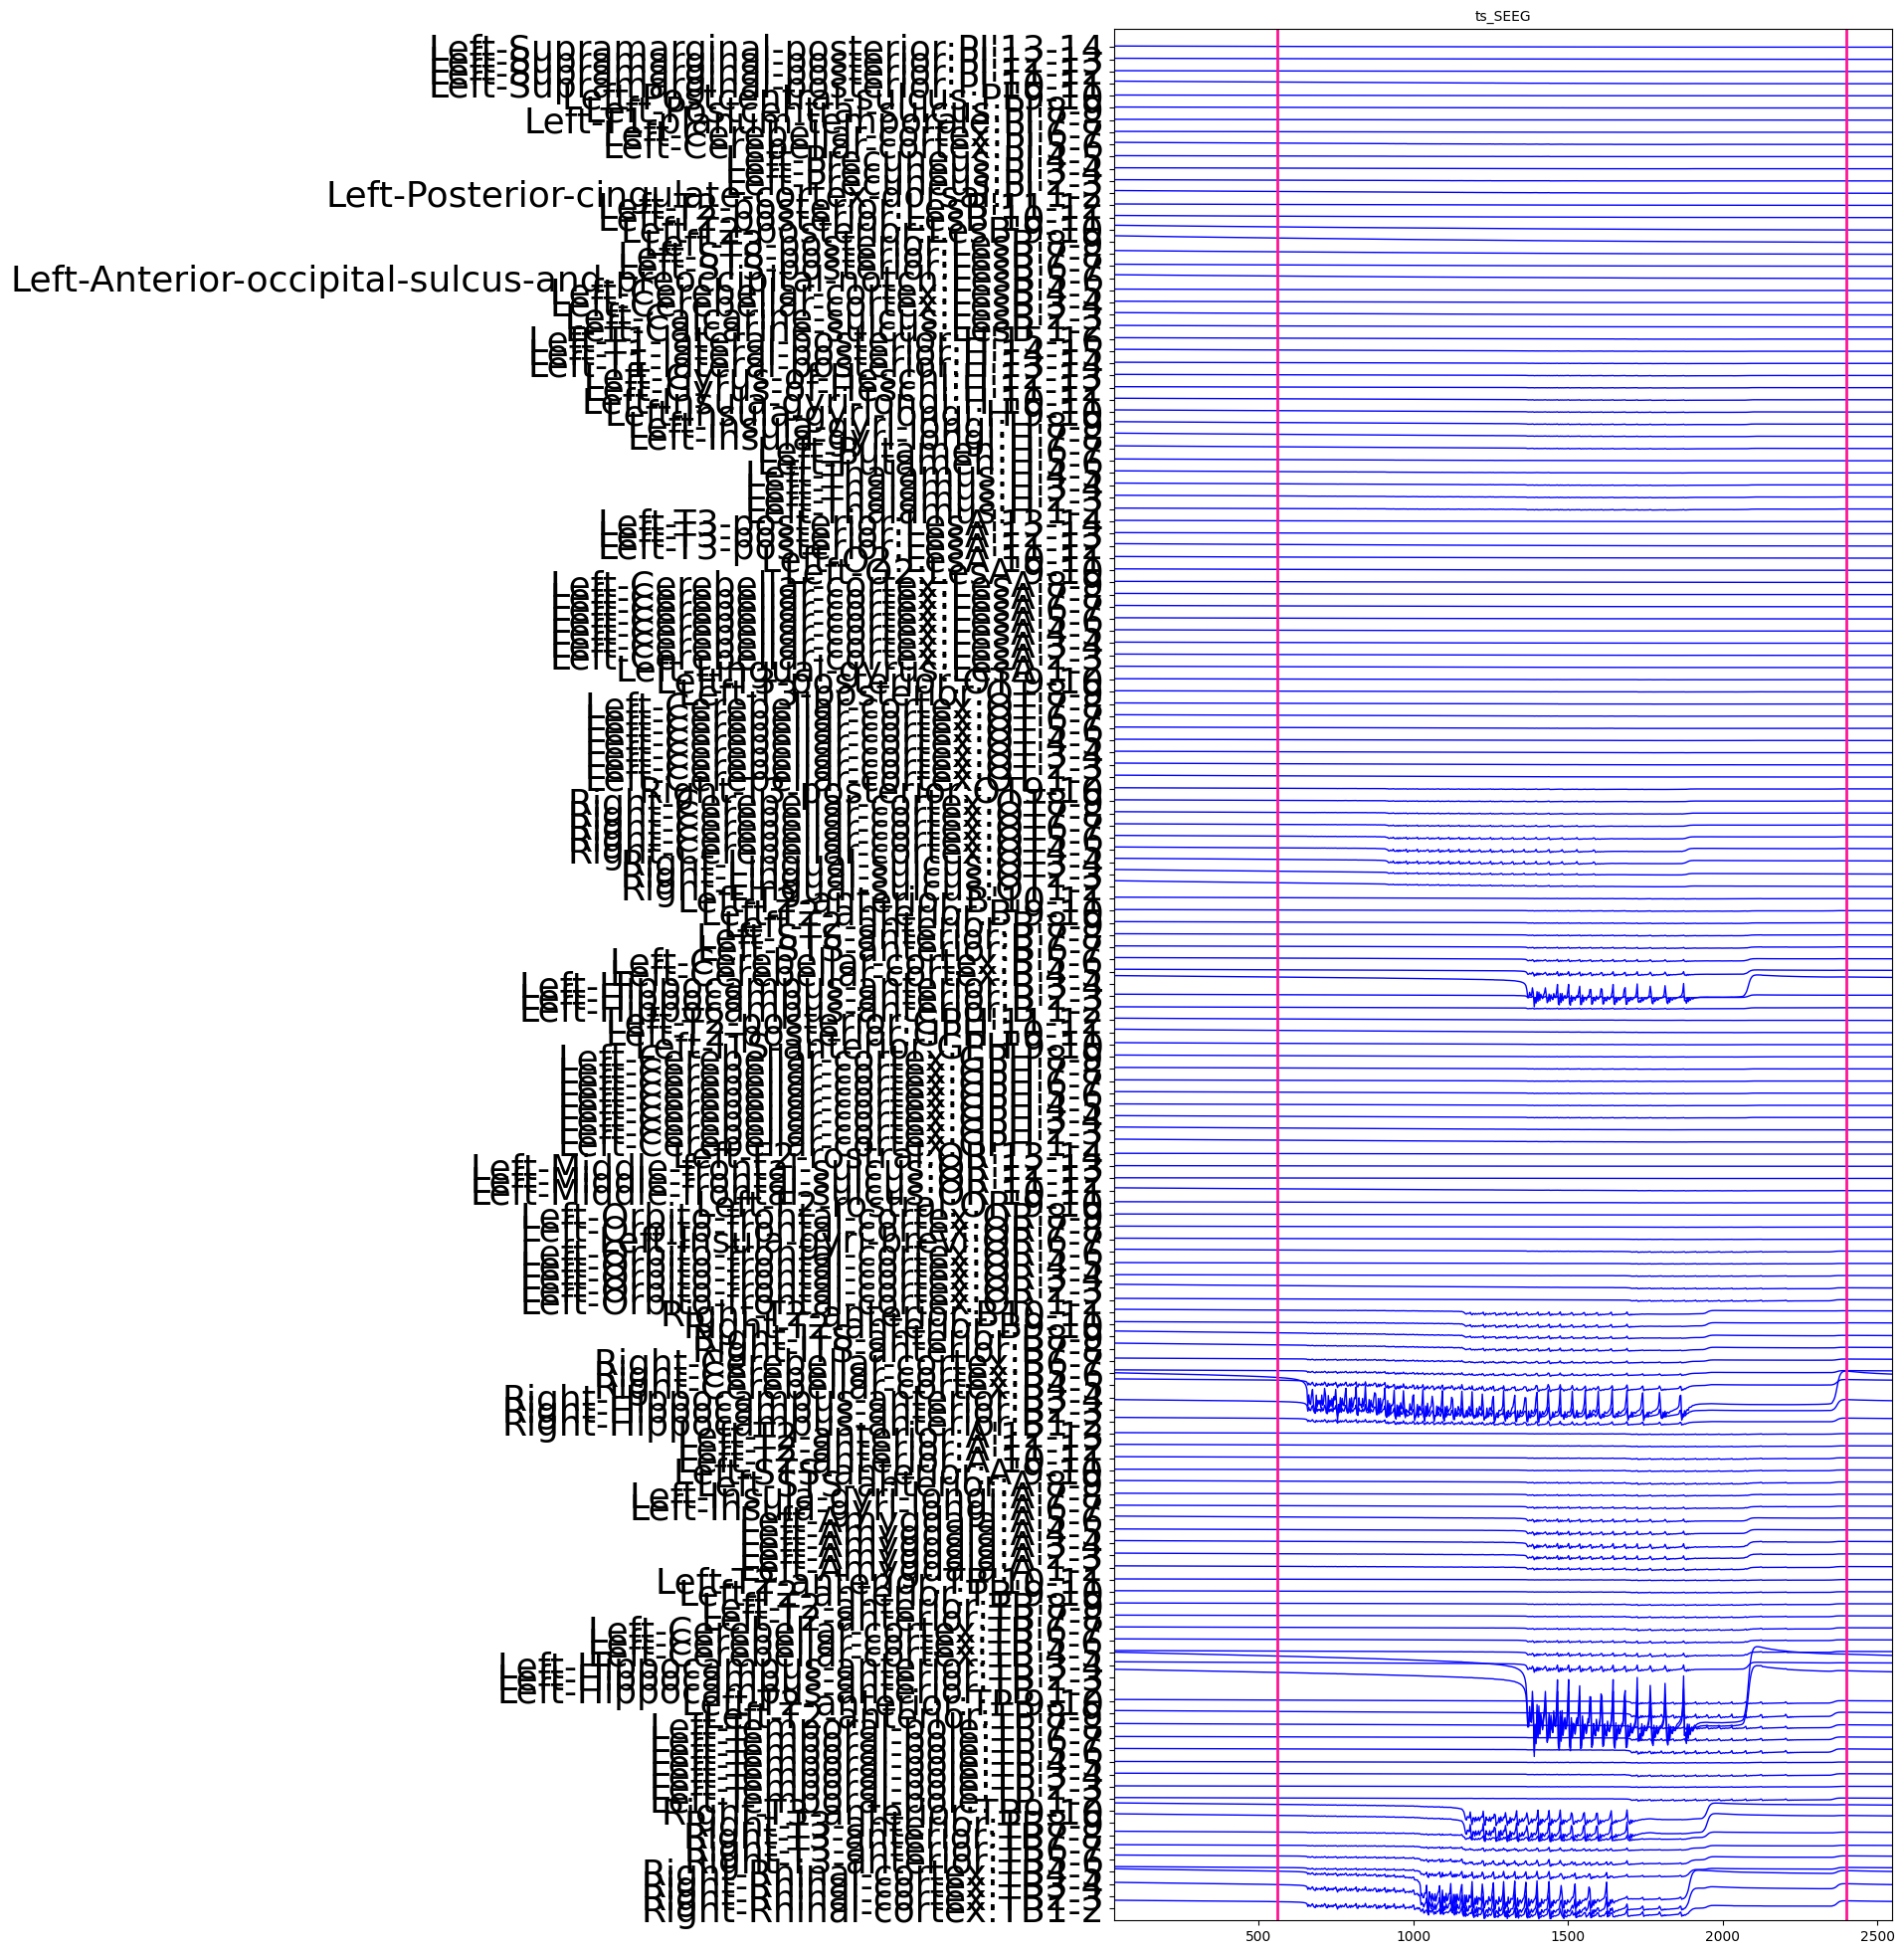

In [33]:
# Mapping source level signals onto SEEG electrodes
seeg = np.dot(gain,srcSig.T)

show_ch = bip_names
sfreq = 250.
nch = [show_ch.index(ichan) for ichan in show_ch]
nch_sourse =[]
for ind_ch, ichan in enumerate(show_ch):
    isource = roi[np.argmax(bip_gain_inv_prior[ind_ch])]
    nch_sourse.append(f'{isource}:{ichan}')

plt.figure(figsize=[10,20])
scaleplt=0.07
base_length = int(5 * sfreq)
for ind, ich in enumerate(nch):
    plt.plot(tts[start_idx:end_idx], scaleplt*(seeg[ich,start_idx:end_idx]-seeg[ich].mean()) + ind, 'blue', lw=1)

# Markers for seizure onset and offset
TS_on = start_idx + 550
TS_off = 2400
plt.axvline(TS_on,color='DeepPink', lw=2)
plt.axvline(TS_off,color='DeepPink', lw=2)

plt.xticks(fontsize=10)
plt.ylim([-1,len(nch)+0.5])
plt.xlim([tts[start_idx],tts[end_idx-1]])
plt.tight_layout()
plt.title(f'ts_SEEG',fontsize = 10)
plt.yticks(np.arange(len(show_ch)),nch_sourse, fontsize=26)
plt.gcf().subplots_adjust(left=0.2)
plt.gcf().subplots_adjust(top=0.97)

***4. Induce a seizure by stimulation***

In [ ]:
# Here we set up the EZ node such that it is close to the critical working point, i.e. the seizure threshold
x0ez=-2.18
x0pz=-2.4
x0num=-2.9

EZ = ['Right-Hippocampus-anterior']
idx_EZ = np.where(roi == EZ)

epileptors = models.Epileptor()
epileptors.x0 = x0num*np.ones(nb_regions)
epileptors.x0[idx_EZ] = x0ez

# Coupling
coupl = coupling.Difference(a=np.array([-0.2]))

# Integrators
heunint = integrators.HeunDeterministic(dt=0.05)

# Monitors
mons = [monitors.TemporalAverage(period=5.0)]

init_cond = np.array([-1.98742113e+00 , -1.87492138e+01, 4.0529597e+00, -1.05214059e+00, -4.95543740e-20, -1.98742113e-01])
print(init_cond)
init_cond_reshaped = np.repeat(init_cond, nb_regions).reshape((1, len(init_cond), nb_regions, 1))

# Simulator
sim = simulator.Simulator(model=epileptors,
                          initial_conditions=init_cond_reshaped,
                          connectivity=con,
                          coupling=coupl,
                          integrator=heunint,
                          monitors=mons)

sim.configure()

# Run
print("Starting simulation...")
tic = tm.time()
simulation_length = 5000
ttavg = sim.run(simulation_length=simulation_length)
print("Finished simulation.")
print('execute for ' + str(tm.time()-tic))


[-1.98742113e+00 -1.87492138e+01  4.05295970e+00 -1.05214059e+00
 -4.95543740e-20 -1.98742113e-01]
Starting simulation...
2023-07-20 22:01:12,775 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 164.22741961479187


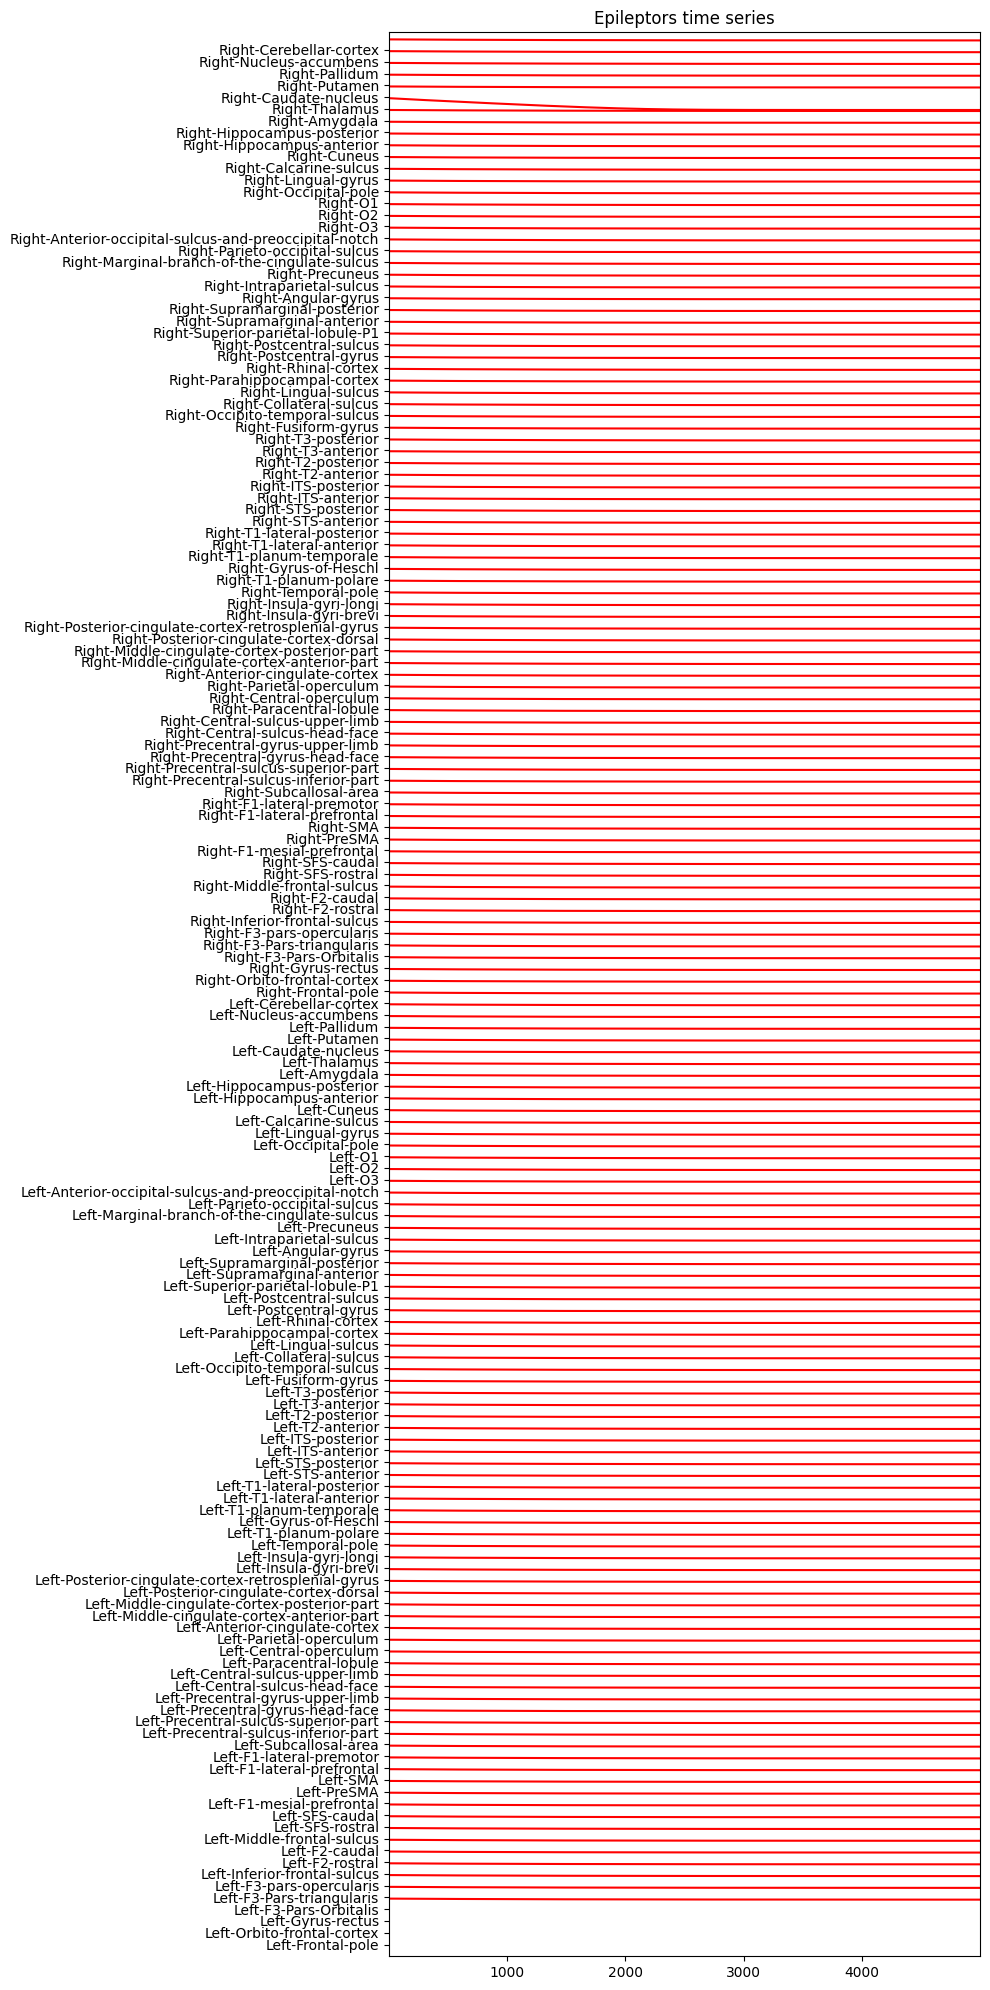

In [ ]:
tts = ttavg[0][0]
tavg = ttavg[0][1]
srcSig = tavg[:,0,:,0]
start_idx = 0
end_idx = tavg.shape[0]

srcSig_normal=srcSig/np.ptp(srcSig)
#Plot raw time series
figure= plt.figure(figsize=(10,20))
plt.plot(tts[start_idx:end_idx],srcSig_normal[start_idx:end_idx] + np.r_[:162], 'r')
plt.title("Epileptors time series")
roi = con.region_labels
plt.yticks(np.arange(len(roi)),roi, fontsize=10)

# These should be set manually, since they depend on the model parameters
plt.xticks(fontsize=10)
plt.ylim([-1,len(roi)+0.5])
plt.xlim([tts[start_idx],tts[end_idx-1]])
plt.tight_layout()
plt.show()

Stimuli applied from the SEEG electrode


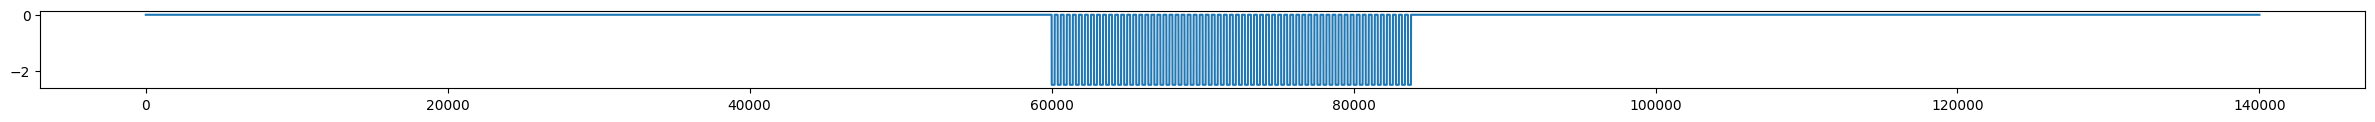

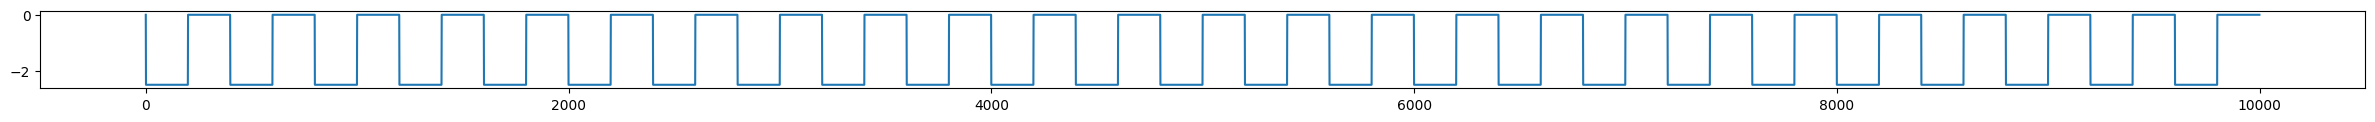

In [ ]:
# Adding the stimulus
# Stimulus parameters
dt = 0.05
onset = 3000 # ms
stim_length = onset + 1200 # stimulation length (including onset) ms
simulation_length = 7000 # ms
freq = 50/1000 # frequency converted to 1/ms
T = 1/freq # pulse repetition period [ms]
tau = 10 # pulse width [ms]
I = 2.5 # intensity [mA]

# Temporal stimulation pattern
class vector1D(equations.DiscreteEquation):
    equation = equations.Final(default="emp")
eqn_t = vector1D()
parameters = {'T': T, 'tau': tau, 'amp': I, 'onset': onset}
pulse1, _ = equations.PulseTrain(parameters=parameters).get_series_data(max_range=stim_length, step=dt)
pulse1_ts = [p[1] for p in pulse1]
parameters = {'T': T, 'tau': tau, 'amp': I, 'onset': onset + tau}
pulse2, _ = equations.PulseTrain(parameters=parameters).get_series_data(max_range=stim_length, step=dt)
pulse2_ts = [p[1] for p in pulse2]
pulse_ts = -np.asarray(pulse1_ts) #- np.asarray(pulse2_ts)
stimulus_ts = np.hstack((pulse_ts[:-1], np.zeros(int(np.ceil((simulation_length - stim_length) / dt)))))
eqn_t.parameters['emp'] = np.copy(stimulus_ts)

print("Stimuli applied from the SEEG electrode")
plt.figure(figsize=(30, 1))
plt.plot(stimulus_ts)
plt.figure(figsize=(30, 1))
plt.plot(stimulus_ts[60000:70000])
plt.show()

In [ ]:
# Spatial stimulation pattern (via weights accross the network nodes)
stim_weight = 3
stim_weights = np.zeros((nb_regions))
stim_weights[idx_EZ] = np.array([stim_weight])
stimulus = patterns.StimuliRegion(temporal=eqn_t,
                                  connectivity=con,
                                  weight=stim_weights)
stimulus.configure_space()
stimulus.configure_time(np.arange(0., np.size(stimulus_ts), 1))

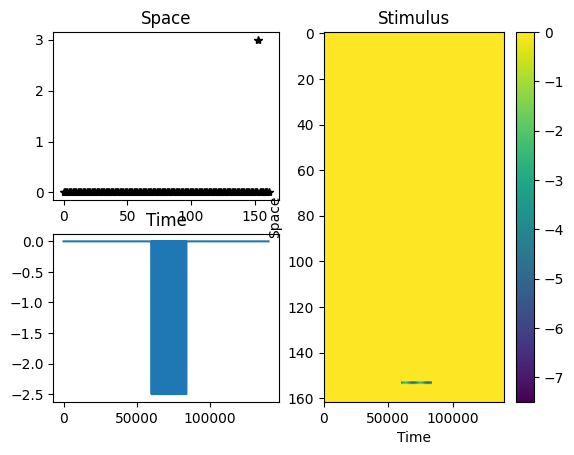

In [ ]:
plot_pattern(stimulus)

In [ ]:
# Here we set up the nodes such that they're close to the critical working point# Initial conditions
x0ez=-2.18
x0pz=-2.2
x0num=-2.4

EZ = ['Right-Hippocampus-anterior']
idx_EZ = np.where(roi == EZ)

epileptors = models.Epileptor(slope=np.array([1]))
epileptors.x0 = x0num*np.ones(nb_regions)
epileptors.x0[idx_EZ] = x0ez

# Initial conditions
init_cond = np.array([-1.98742113e+00 , -1.87492138e+01, 4.0529597e+00, -1.05214059e+00, -4.95543740e-20, -1.98742113e-01])
print(init_cond)
init_cond_reshaped = np.repeat(init_cond, nb_regions).reshape((1, len(init_cond), nb_regions, 1))

# Simulator
sim = simulator.Simulator(model=epileptors,
                          stimulus=stimulus,
                          initial_conditions=init_cond_reshaped,
                          connectivity=con,
                          coupling=coupl,
                          integrator=heunint,
                          monitors=mons)

sim.configure()

# Run
print("Starting simulation...")
tic = tm.time()
ttavg = sim.run(simulation_length=simulation_length)
print("Finished simulation.")
print('execute for ' + str(tm.time()-tic))

[-1.98742113e+00 -1.87492138e+01  4.05295970e+00 -1.05214059e+00
 -4.95543740e-20 -1.98742113e-01]
Starting simulation...
2023-07-19 20:08:05,480 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation.
execute for 202.96317386627197


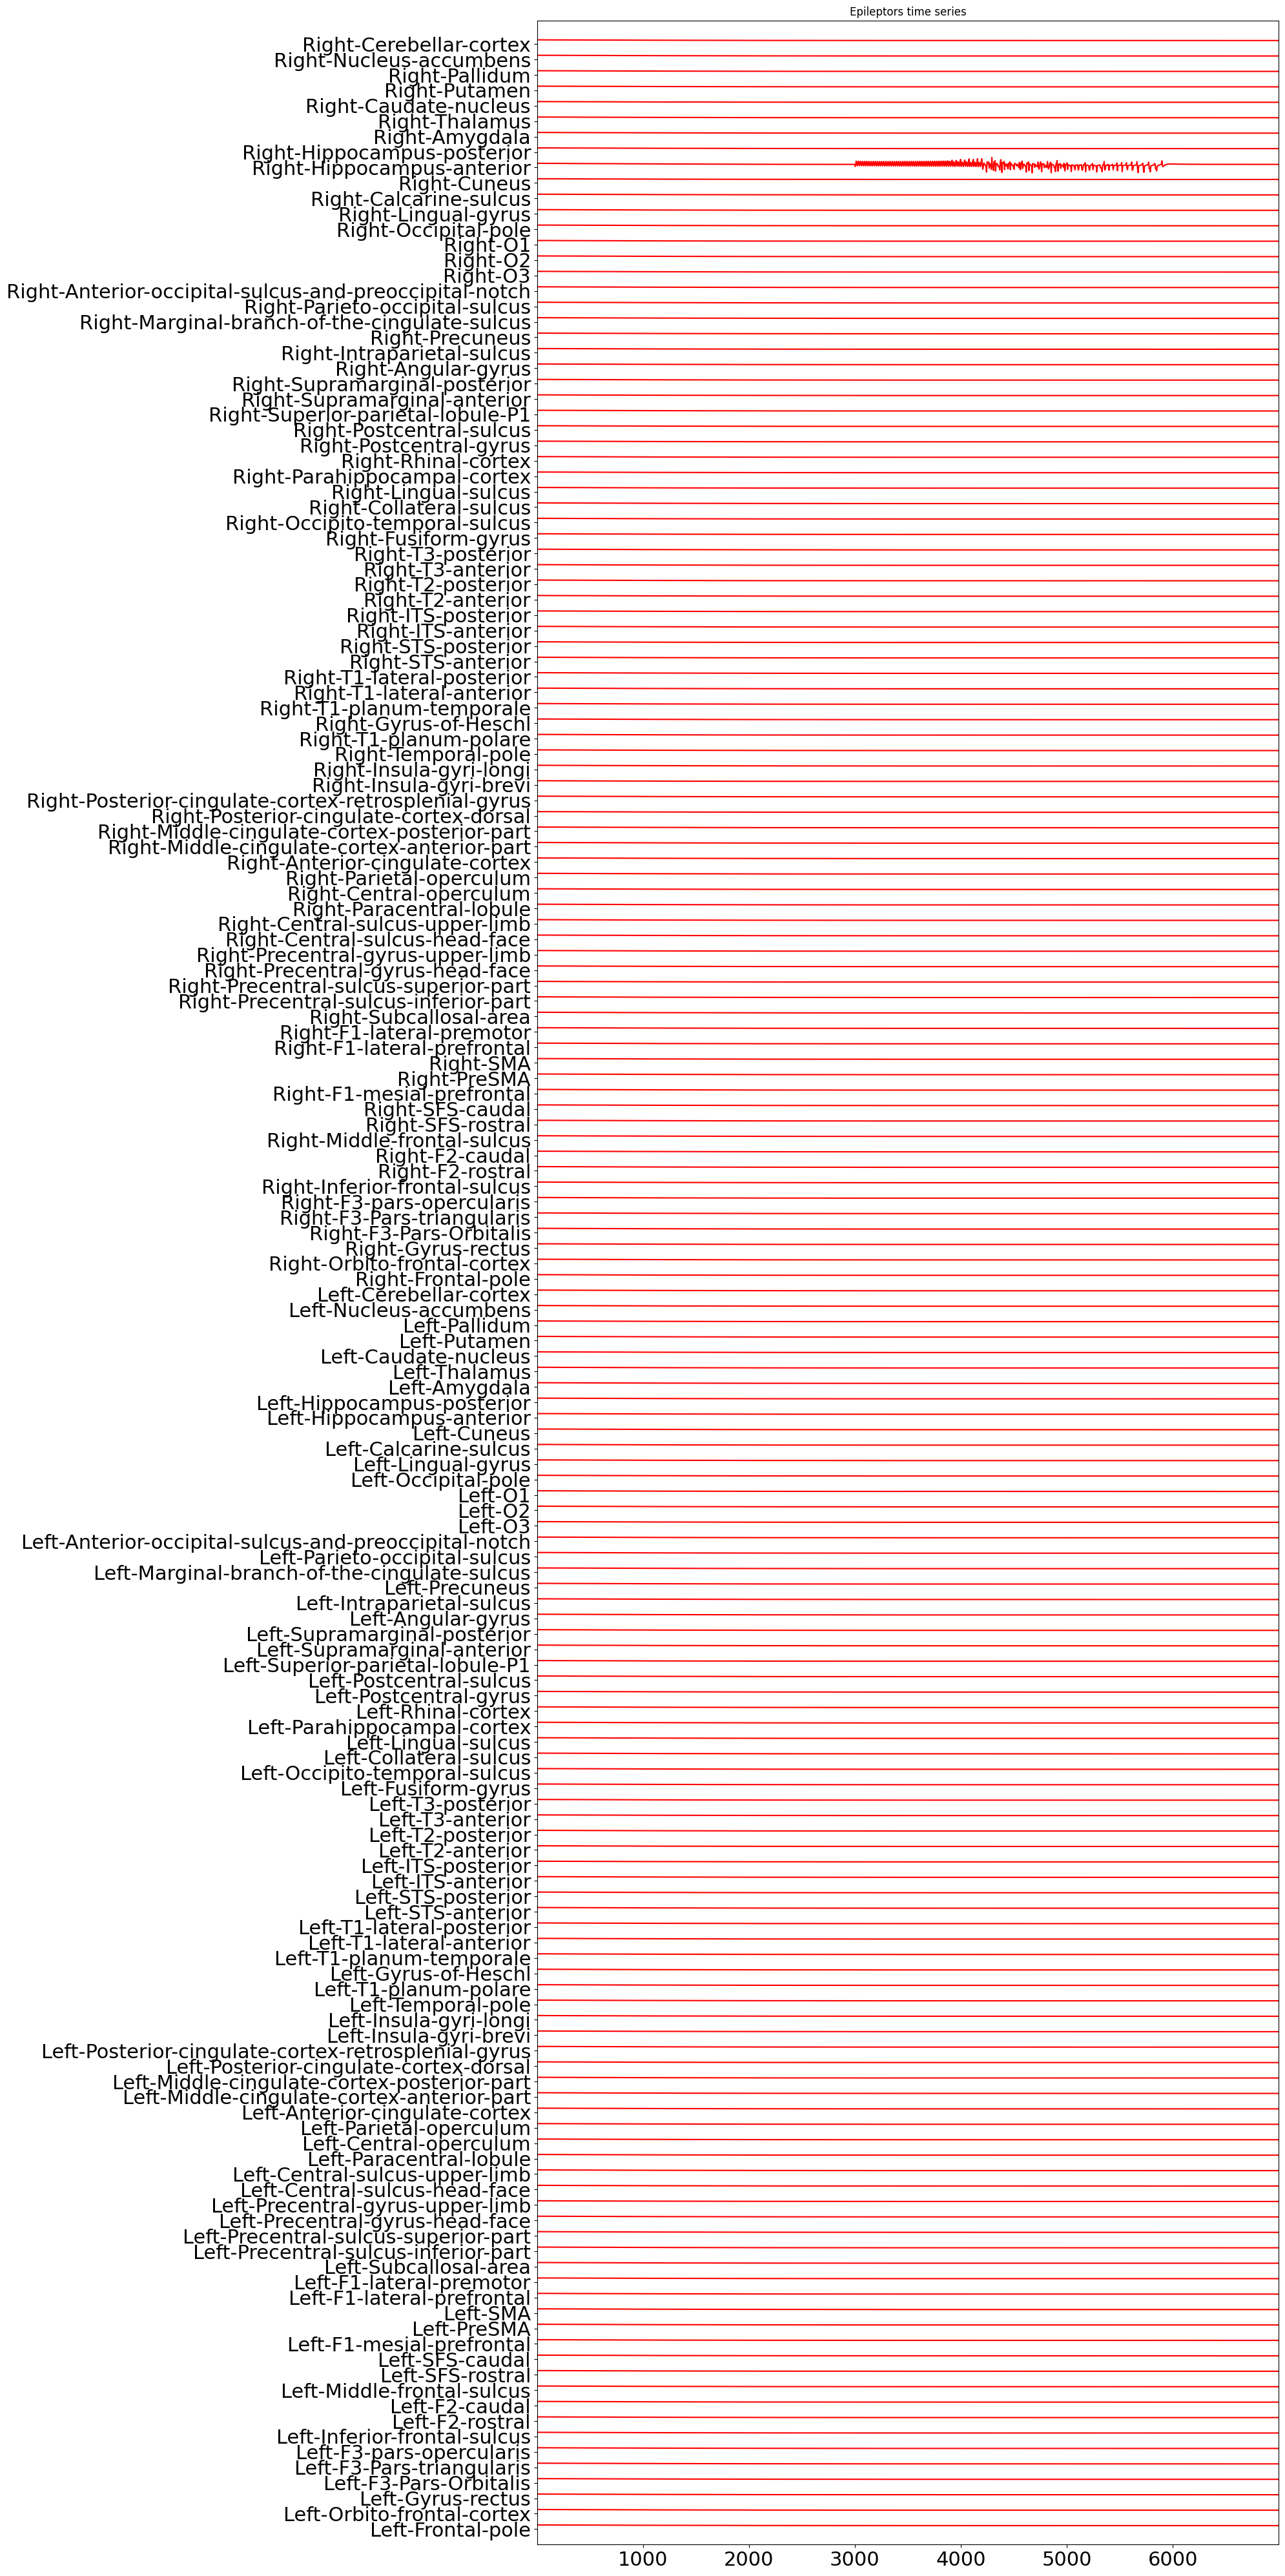

In [ ]:
tts = ttavg[0][0]
tavg = ttavg[0][1]
srcSig = tavg[:,0,:,0]
start_idx = 0
end_idx = tavg.shape[0]

srcSig_normal=srcSig/np.ptp(srcSig)
#Plot raw time series
figure= plt.figure(figsize=(10,20))
plt.plot(tts[start_idx:end_idx], srcSig_normal[start_idx:end_idx] + np.r_[:162], 'r')
plt.title("Epileptors time series")
roi = con.region_labels
plt.yticks(np.arange(len(roi)),roi, fontsize=10)

# These should be set manually, since they depend on the model parameters
plt.xticks(fontsize=10)
plt.ylim([-1,len(roi)+0.5])
plt.xlim([tts[start_idx],tts[end_idx-1]])
plt.tight_layout()
plt.show()

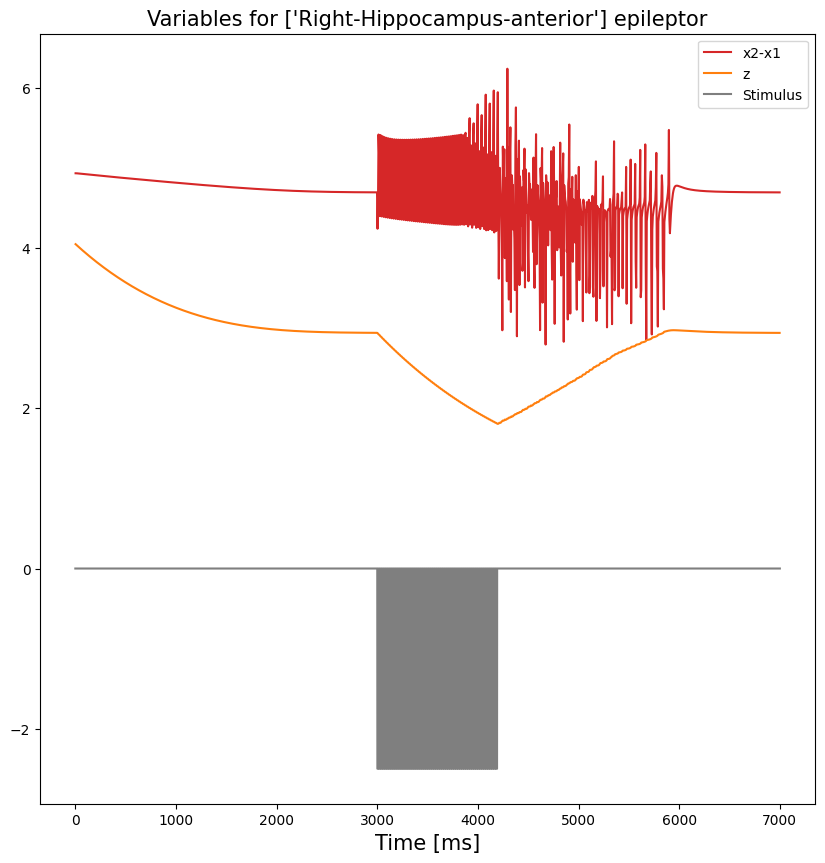

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(tts[:], tavg[:, 0, idx_EZ[0], 0] + 4, 'C3', label='x2-x1')
plt.plot(tts[:], tavg[:, 1, idx_EZ[0], 0] , 'C1', label='z')
plt.plot(stimulus.time.T, stimulus.temporal_pattern.T, 'C7', label='Stimulus')
plt.title(f"Variables for {EZ} epileptor", fontsize=15)
plt.xlabel('Time [ms]', fontsize=15)
plt.legend()
plt.show()

## Conclusions

In conclusion, this final session of the Educational Course has shed light on the critical role of whole-brain modeling in clinical settings. Throughout the tutorial, we have witnessed the remarkable power of simulating brain dynamics, unveiling intricate mechanisms associated with pathologies that are challenging to measure in vivo. Moreover, we have explored how whole-brain modeling plays a pivotal role in the discovery of disease biomarkers, enabling early-stage diagnosis and classification.

The spotlight of our discussions was focused on two significant diseases: Alzheimer's disease and Epilepsy. By delving into these conditions, we have gained valuable insights into the potential of whole-brain modeling to revolutionize the understanding and management of neurological disorders.

As we wrap up this session, we are filled with enthusiasm and optimism for the future of whole-brain modeling in advancing clinical research. The knowledge and techniques shared here today have the potential to transform the way we diagnose, treat, and understand neurological diseases. By harnessing the power of computational modeling, we stand on the brink of groundbreaking advancements that will ultimately improve the lives of countless individuals worldwide.

Let us carry forward the valuable insights gained from this course and continue our collaborative efforts in pushing the boundaries of neuroscience. Together, we can pave the way for innovative approaches to tackle complex brain disorders and contribute to a healthier and more informed society.

With gratitude for your active participation and dedication to the field, we look forward to witnessing the incredible impact each of you will make in your future endeavors.

Thank you, and may our collective journey in the realm of whole-brain modeling be filled with inspiration and breakthroughs.

In [ ]:
from IPython.display import HTML

# Replace the form_link with your Google Form link
form_link = "https://forms.gle/tFQtt4eQsKj2iGuT7"

# Create the hyperlink and open the form in a new tab with increased font size
HTML(f'<a href="{form_link}" target="_blank" style="font-size: 30px;">Click here to access the survey</a>')


#@title #Survey


##References


> Jansen, B.H. and Rit, V.G. (1995) **Electroencephalogram and visual evoked potential generation in a mathematical model of coupled cortical columns.** *Biological cybernetics*, 73(4), pp.357-366.    

> Da Silva, F.L., Hoeks, A., Smits, H. and Zetterberg, L.H. (1974). **Model of brain rhythmic activity.** *Kybernetik*, 15(1), pp.27-37.  

> David, O. and Friston, K.J. (2003) **A neural mass model for MEG/EEG: coupling and neuronal dynamics.** *NeuroImage*, 20(3), pp.1743-1755.  

> Dollomaja B., Makhalova J., Wang H., Bartolomei F., Jirsa V., Bernard C.(2023). **Personalized whole brain modeling of status epilepticus.** *Epilepsy Behav*, 142:109175. doi: 10.1016/j.yebeh.2023.109175.

> Stefanovski, L., Triebkorn, P., Spiegler, A., Diaz-Cortes, MA.,, Solodkin, A., Jirsa, V., McIntosh, RA., Ritter, P., and Alzheimer's Disease Neuroimaging Initiative, F.M. (2019). **Linking Molecular Pathways and Large-Scale Computational Modeling to Assess Candidate Disease Mechanisms and Pharmacodynamics in Alzheimer's Disease.** *Front Comput Neurosci
*, DOI: 10.3389/fncom.2019.00054.

> Wang H.,  Woodman M., Triebkorn P., Lemarechal JD.,, Jha J., Dollomaja B., Vattikonda AN., Sip V., Villalon SM, Hashemi M., Guye M., Makhalova J., Bartolomei F., Jirsa V. (2023). **Delineating epileptogenic networks using brain imaging data and personalized modeling in drug-resistant epilepsy.** *Sci Transl Med*, 15(680):eabp8982. doi: 10.1126/scitranslmed.abp8982


